### Librerias 

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install openpyxl

## Hipotesis 
1. A mayor producción de café en un país, es más probable que se observe una mayor cantidad de café de especialidad en el mismo. La hipótesis se basa en la suposición de que a medida que la producción total de café aumenta en un país, también aumenta la posibilidad de que se cultiven variedades de café de mayor calidad y se produzca café de especialidad.
2. El país que es el mayor productor de café a nivel mundial también es el que más café de especialidad aporta en comparación con otros países productores. Esta hipótesis se basa en la idea de que el país que lidera la producción mundial de café, además de cultivar y exportar grandes volúmenes de café convencional, también tiene la capacidad y los recursos para producir café de especialidad en mayor cantidad en comparación con otros países productores.

### Cargamos el Data frame

In [130]:
df_quality=pd.read_csv('./coffee.csv')

In [131]:
df_quality.head(3)

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
0,United States,kona,0,0,0,2010,kona pacific farmers cooperative,Arabica,NaN,NaN,...,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.00,86.25,Unknown
1,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,7.92,7.75,8.33,8.00,10.0,10.0,0.08,86.17,Unknown
2,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,8.00,7.75,7.92,8.00,10.0,10.0,0.01,86.17,Unknown


In [132]:
columnas_eliminar= [1,2,3,4,9]
df_quality=df_quality.drop(df_quality.columns[columnas_eliminar], axis=1)

### Renombramos las columnas para un mayor entendimiento 

In [133]:
new_names={'Location.Country':'Country','Data.Owner':'Owner','Data.Type.Species':'Species','Data.Type.Variety':'Variety',
           'Data.Production.Number of bags':'Production_Bag','Data.Production.Bag weight':'KG_x_Bag',
           'Data.Scores.Aroma':'Score_Aroma','Data.Scores.Flavor':'Score_Flavor','Data.Scores.Aftertaste':'Score_Aftertaste',
           'Data.Scores.Acidity':'Score_Acidity','Data.Scores.Body':'Score_Body','Data.Scores.Balance':'Score_Balance',
           'Data.Scores.Uniformity':'Score_Uniformity','Data.Scores.Sweetness':'Score_Sweetness','Data.Scores.Moisture':'Score_Moisture',
           'Data.Scores.Total':'Score_Total','Data.Color':'Color'}

df_quality=df_quality.rename(columns=new_names)
df_quality.head(2)

,Country,Year,Owner,Species,Variety,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total,Color
0,United States,2010,kona pacific farmers cooperative,Arabica,NaN,25,45.3592,8.25,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.00,86.25,Unknown
1,Brazil,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,300,60.0000,8.17,7.92,7.92,7.75,8.33,8.00,10.0,10.0,0.08,86.17,Unknown


### Trasladamos la última columna a la posición 5 para agrupar todos los datos característicos y dejar a la derecha todos los cualitativos

In [134]:
# Recorremos las columnas
columnas = df_quality.columns.tolist()  
# Guardamos la última columna en una variable
ultima_columna = columnas[-1]  
# Eliminamos la última columna de la lista de columnas
columnas.remove(ultima_columna)  
# Insertar la última columna en la posición deseada
columnas.insert(5, ultima_columna)  
# Añadimos la columna en la posición deseada 
df_quality=df_quality[columnas]
df_quality

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
0,United States,2010,kona pacific farmers cooperative,Arabica,NaN,Unknown,25,45.3592,8.25,8.42,8.08,7.75,7.67,7.83,10.00,10.00,0.00,86.25
1,Brazil,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,Unknown,300,60.0000,8.17,7.92,7.92,7.75,8.33,8.00,10.00,10.00,0.08,86.17
2,Brazil,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,Unknown,300,60.0000,8.42,7.92,8.00,7.75,7.92,8.00,10.00,10.00,0.01,86.17
3,Ethiopia,2010,ethiopia commodity exchange,Arabica,NaN,Unknown,360,6.0000,7.67,8.00,7.83,8.00,7.92,7.83,10.00,10.00,0.00,85.08
4,Ethiopia,2010,ethiopia commodity exchange,Arabica,NaN,Unknown,300,6.0000,7.58,7.83,7.58,8.00,7.83,7.50,10.00,10.00,0.10,83.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,Guatemala,2017,juan luis alvarado romero,Arabica,Bourbon,Green,50,69.0000,7.58,7.67,7.42,7.42,7.67,7.67,8.67,8.67,0.10,79.08
985,Honduras,2017,bismarck castro,Arabica,Caturra,Green,275,69.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00
986,India,2017,nishant gurjer,Robusta,NaN,Unknown,320,60.0000,8.00,7.75,7.92,8.00,7.92,7.92,10.00,8.00,0.00,83.50
987,India,2017,nishant gurjer,Robusta,NaN,Bluish-Green,320,60.0000,7.67,7.75,7.83,7.67,7.92,7.83,10.00,7.92,0.10,82.50


In [135]:
df_quality['Country'].nunique()

32

## Calculamos la producción total multiplicando el nº de bolsas por su peso

In [136]:
# Nos percatamos de que existen valores fuera de rango.
df_quality[df_quality['KG_x_Bag']==19200]

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
832,Ethiopia,2016,seid damtew coffee planataion,Arabica,Other,Green,320,19200.0,7.75,8.0,7.58,8.00,8.00,7.92,10.0,10.0,0.11,85.08
927,Ethiopia,2017,seid damtew coffee planataion,Arabica,Caturra,NaN,320,19200.0,7.83,8.0,7.83,8.17,7.92,8.00,10.0,10.0,0.09,85.75


#### Arreglamos los valores fuera de rango de KG por bolsa basandonos en el percentil 50 de cada país

In [137]:
df_quality[df_quality['Country']== 'Ethiopia'].describe()

,Year,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2013.714286,267.500000,1418.357143,7.917143,8.011786,7.830357,8.015000,7.887143,7.938214,9.904643,9.905000,0.091786,85.358929
std,1.882810,93.199309,5022.276334,0.367573,0.402879,0.381609,0.362221,0.322810,0.302851,0.298893,0.348813,0.035177,2.638220
min,2010.000000,50.000000,6.000000,7.250000,7.250000,7.170000,7.330000,7.330000,7.170000,8.670000,8.670000,0.000000,80.000000
25%,2013.750000,250.000000,60.000000,7.730000,7.750000,7.580000,7.810000,7.670000,7.730000,10.000000,10.000000,0.097500,83.957500
50%,2014.000000,300.000000,60.000000,7.830000,8.000000,7.830000,8.000000,7.875000,7.920000,10.000000,10.000000,0.100000,85.080000
75%,2014.000000,320.000000,60.000000,8.170000,8.170000,7.940000,8.170000,8.020000,8.102500,10.000000,10.000000,0.110000,87.122500
max,2017.000000,360.000000,19200.000000,8.750000,8.830000,8.670000,8.750000,8.500000,8.420000,10.000000,10.000000,0.120000,90.580000


In [138]:
# Ethiopia
fila=832,927
columna='KG_x_Bag'
valor=60

df_quality.at[fila,columna]=valor

In [139]:
df_quality[df_quality['Country']== 'Guatemala'].describe()

,Year,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2014.065476,201.458333,58.640335,7.552262,7.491131,7.264643,7.595893,7.473869,7.471488,9.849048,9.860893,0.103929,81.828274
std,1.791998,95.767299,115.856732,0.277881,0.357378,0.361331,0.271997,0.276516,0.313790,0.417218,0.722025,0.021557,2.844179
min,2012.000000,1.000000,0.000000,6.500000,6.080000,6.170000,7.000000,6.670000,6.580000,8.000000,1.330000,0.000000,59.830000
25%,2012.000000,123.750000,2.000000,7.420000,7.330000,7.170000,7.420000,7.330000,7.310000,10.000000,10.000000,0.100000,80.730000
50%,2014.000000,250.000000,69.000000,7.580000,7.500000,7.330000,7.580000,7.500000,7.500000,10.000000,10.000000,0.110000,82.500000
75%,2016.000000,250.000000,69.000000,7.750000,7.750000,7.500000,7.770000,7.670000,7.670000,10.000000,10.000000,0.110000,83.500000
max,2017.000000,450.000000,1500.000000,8.250000,8.170000,8.000000,8.330000,8.170000,8.580000,10.000000,10.000000,0.130000,85.920000


In [140]:
# Guatemala
fila=871
columna='KG_x_Bag'
valor=69

df_quality.at[fila,columna]=valor

In [141]:
df_quality[df_quality['Country']== 'Costa Rica'].describe()

,Year,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,2014.279070,202.395349,918.577737,7.650698,7.507442,7.502326,7.554884,7.505581,7.632093,9.845116,9.891395,0.086279,82.563721
std,1.201697,99.369234,4035.611298,0.301207,0.284990,0.277092,0.306550,0.335540,0.377546,0.613853,0.522802,0.043041,2.462499
min,2012.000000,1.000000,1.000000,6.330000,6.500000,6.330000,6.830000,6.330000,6.500000,6.670000,6.670000,0.000000,71.750000
25%,2013.500000,150.000000,1.000000,7.500000,7.330000,7.420000,7.250000,7.330000,7.500000,10.000000,10.000000,0.090000,81.625000
50%,2014.000000,250.000000,2.000000,7.670000,7.500000,7.500000,7.670000,7.500000,7.670000,10.000000,10.000000,0.100000,83.000000
75%,2015.000000,262.500000,69.000000,7.830000,7.670000,7.670000,7.750000,7.750000,7.750000,10.000000,10.000000,0.110000,84.085000
max,2017.000000,320.000000,18975.000000,8.080000,8.250000,8.000000,8.170000,8.080000,8.580000,10.000000,10.000000,0.130000,87.170000


In [142]:
# Costa Rica
fila= 789,797,804
columna='KG_x_Bag'
valor=69
df_quality.at[fila,columna]=valor

In [143]:
df_quality[df_quality['Country']== 'Kenya'].describe()

,Year,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2013.714286,154.047619,1928.285714,7.793810,7.808571,7.706667,7.876190,7.721905,7.793810,9.968095,9.968095,0.076667,84.293333
std,1.847779,114.891460,4854.899094,0.282904,0.226148,0.225817,0.291178,0.214793,0.231851,0.146206,0.146206,0.050531,1.587055
min,2012.000000,1.000000,1.000000,7.000000,7.080000,7.000000,7.170000,7.250000,7.250000,9.330000,9.330000,0.000000,79.830000
25%,2012.000000,27.000000,60.000000,7.750000,7.750000,7.670000,7.750000,7.580000,7.750000,10.000000,10.000000,0.000000,84.000000
50%,2013.000000,150.000000,60.000000,7.830000,7.830000,7.750000,7.920000,7.750000,7.750000,10.000000,10.000000,0.100000,84.580000
75%,2014.000000,235.000000,60.000000,7.920000,7.920000,7.830000,8.080000,7.830000,7.830000,10.000000,10.000000,0.110000,85.330000
max,2017.000000,320.000000,18000.000000,8.170000,8.170000,8.000000,8.500000,8.000000,8.500000,10.000000,10.000000,0.130000,86.250000


In [144]:
# Kenya
fila=87,374,380,980
columna='KG_x_Bag'
valor=60
df_quality.at[fila,columna]=valor

In [145]:
df_quality[df_quality['Country']== 'Peru'].describe()

,Year,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2013.333333,259.444444,1550.148867,7.695556,7.638889,7.517778,7.693333,7.788889,7.647778,9.481111,9.851111,0.073333,82.287778
std,1.500000,69.121471,4593.785179,0.408599,0.432939,0.431647,0.412402,0.279707,0.265272,0.554672,0.295442,0.055453,3.563579
min,2012.000000,100.000000,2.000000,7.000000,7.080000,7.000000,7.250000,7.420000,7.420000,8.670000,9.330000,0.000000,77.000000
25%,2013.000000,275.000000,2.267960,7.420000,7.420000,7.170000,7.330000,7.500000,7.500000,9.330000,10.000000,0.000000,79.750000
50%,2013.000000,280.000000,2.267960,7.670000,7.580000,7.500000,7.670000,7.920000,7.580000,9.330000,10.000000,0.100000,82.420000
75%,2013.000000,280.000000,69.000000,7.920000,7.750000,7.580000,7.830000,7.920000,7.750000,10.000000,10.000000,0.110000,83.330000
max,2017.000000,320.000000,13800.000000,8.420000,8.500000,8.330000,8.500000,8.250000,8.250000,10.000000,10.000000,0.120000,88.750000


In [146]:
# Peru
fila= 940
columna='KG_x_Bag'
valor=69
df_quality.at[fila,columna]=valor

In [147]:
df_quality[df_quality['Country']== 'Uganda'].describe()

,Year,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,36.000000
mean,2013.388889,152.138889,672.166667,7.884167,7.752778,7.622500,7.708611,7.720000,7.662500,10.0,9.363333,0.113611,83.451944
std,1.049565,143.960739,2451.455748,0.265625,0.241999,0.211517,0.195728,0.251714,0.158428,0.0,1.043135,0.020585,1.613574
min,2012.000000,1.000000,60.000000,7.330000,6.920000,7.170000,7.330000,7.330000,7.420000,10.0,7.580000,0.000000,80.500000
25%,2013.000000,1.000000,60.000000,7.670000,7.580000,7.500000,7.580000,7.500000,7.500000,10.0,7.937500,0.110000,82.647500
50%,2013.000000,125.000000,60.000000,7.875000,7.750000,7.625000,7.710000,7.670000,7.670000,10.0,10.000000,0.120000,83.210000
75%,2014.000000,320.000000,60.000000,8.020000,7.920000,7.750000,7.830000,7.830000,7.750000,10.0,10.000000,0.120000,84.542500
max,2016.000000,325.000000,12000.000000,8.420000,8.170000,8.170000,8.170000,8.250000,7.920000,10.0,10.000000,0.130000,86.830000


In [148]:
# Uganda
fila= 755,759,840
columna='KG_x_Bag'
valor=60
df_quality.at[fila,columna]=valor

In [149]:
df_quality[df_quality['Country']== 'Honduras'].describe()

,Year,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
count,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2015.18750,245.666667,426.020833,7.263750,7.202917,7.034792,7.212708,7.210208,7.127083,9.611042,9.625000,0.107708,79.040625
std,1.39385,83.136989,2734.483774,1.105329,1.123126,1.110156,1.106720,1.106921,1.123469,1.524181,1.524621,0.009728,12.211962
min,2012.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000
25%,2014.00000,275.000000,1.000000,7.250000,7.230000,7.000000,7.170000,7.170000,7.080000,10.000000,10.000000,0.100000,80.480000
50%,2015.00000,275.000000,2.000000,7.500000,7.375000,7.170000,7.420000,7.375000,7.330000,10.000000,10.000000,0.110000,81.540000
75%,2016.00000,275.000000,69.000000,7.580000,7.500000,7.352500,7.520000,7.500000,7.500000,10.000000,10.000000,0.110000,82.352500
max,2018.00000,285.000000,18975.000000,8.170000,8.080000,8.080000,8.000000,8.080000,8.000000,10.000000,10.000000,0.130000,86.670000


In [150]:
# Honduras
fila= 673
columna='KG_x_Bag'
valor=69
df_quality.at[fila,columna]=valor

In [151]:
df_quality[df_quality['Country']== 'Guatemala'].describe()

,Year,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2014.065476,201.458333,59.051049,7.552262,7.491131,7.264643,7.595893,7.473869,7.471488,9.849048,9.860893,0.103929,81.828274
std,1.791998,95.767299,115.769876,0.277881,0.357378,0.361331,0.271997,0.276516,0.313790,0.417218,0.722025,0.021557,2.844179
min,2012.000000,1.000000,1.000000,6.500000,6.080000,6.170000,7.000000,6.670000,6.580000,8.000000,1.330000,0.000000,59.830000
25%,2012.000000,123.750000,2.000000,7.420000,7.330000,7.170000,7.420000,7.330000,7.310000,10.000000,10.000000,0.100000,80.730000
50%,2014.000000,250.000000,69.000000,7.580000,7.500000,7.330000,7.580000,7.500000,7.500000,10.000000,10.000000,0.110000,82.500000
75%,2016.000000,250.000000,69.000000,7.750000,7.750000,7.500000,7.770000,7.670000,7.670000,10.000000,10.000000,0.110000,83.500000
max,2017.000000,450.000000,1500.000000,8.250000,8.170000,8.000000,8.330000,8.170000,8.580000,10.000000,10.000000,0.130000,85.920000


In [152]:
df_quality[df_quality['Country']== 'Guatemala']

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
42,Guatemala,2012,juan luis alvarado romero,Arabica,Bourbon,Green,150,1.0,7.83,8.00,8.00,8.17,7.83,8.00,10.00,10.00,0.12,85.83
43,Guatemala,2012,juan luis alvarado romero,Arabica,Catuai,Bluish-Green,275,1.0,8.00,8.00,7.83,8.33,7.83,7.83,10.00,10.00,0.10,85.83
51,Guatemala,2012,the coffee source inc.,Arabica,Caturra,Unknown,250,1.0,8.25,8.00,7.67,7.92,7.75,7.67,10.00,10.00,0.00,85.17
60,Guatemala,2012,juan luis alvarado romero,Arabica,Bourbon,Green,250,1.0,8.00,7.83,7.67,7.83,7.67,8.00,10.00,10.00,0.11,84.67
61,Guatemala,2012,juan luis alvarado romero,Arabica,Bourbon,Green,125,1.0,7.67,7.83,7.67,8.00,7.67,7.83,10.00,10.00,0.12,84.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Guatemala,2017,juan luis alvarado romero,Arabica,Bourbon,Green,25,69.0,7.67,7.67,7.33,7.58,7.67,7.50,9.33,9.33,0.10,80.92
976,Guatemala,2017,juan luis alvarado romero,Arabica,Caturra,Green,275,69.0,7.33,7.25,7.08,7.17,7.25,7.17,10.00,10.00,0.10,80.50
981,Guatemala,2017,juan luis alvarado romero,Arabica,Bourbon,Green,50,69.0,7.33,7.25,6.92,7.33,7.25,7.33,9.33,10.00,0.10,79.83
982,Guatemala,2017,juan luis alvarado romero,Arabica,Bourbon,Green,50,69.0,7.33,7.42,7.33,7.42,7.50,7.42,8.67,9.33,0.10,79.17


In [153]:
df_quality.head(5)

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
0,United States,2010,kona pacific farmers cooperative,Arabica,NaN,Unknown,25,45.3592,8.25,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.00,86.25
1,Brazil,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,Unknown,300,60.0000,8.17,7.92,7.92,7.75,8.33,8.00,10.0,10.0,0.08,86.17
2,Brazil,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,Unknown,300,60.0000,8.42,7.92,8.00,7.75,7.92,8.00,10.0,10.0,0.01,86.17
3,Ethiopia,2010,ethiopia commodity exchange,Arabica,NaN,Unknown,360,6.0000,7.67,8.00,7.83,8.00,7.92,7.83,10.0,10.0,0.00,85.08
4,Ethiopia,2010,ethiopia commodity exchange,Arabica,NaN,Unknown,300,6.0000,7.58,7.83,7.58,8.00,7.83,7.50,10.0,10.0,0.10,83.83


In [154]:
# Calculamos y agregamos la columna con el total de produccion 

production_total= df_quality['Production_Bag']*df_quality['KG_x_Bag']

In [155]:
df_quality.insert(8,'Total_Specialty_coffee',production_total)
df_quality

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Total_Specialty_coffee,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
0,United States,2010,kona pacific farmers cooperative,Arabica,NaN,Unknown,25,45.3592,1133.98,8.25,8.42,8.08,7.75,7.67,7.83,10.00,10.00,0.00,86.25
1,Brazil,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,Unknown,300,60.0000,18000.00,8.17,7.92,7.92,7.75,8.33,8.00,10.00,10.00,0.08,86.17
2,Brazil,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,Unknown,300,60.0000,18000.00,8.42,7.92,8.00,7.75,7.92,8.00,10.00,10.00,0.01,86.17
3,Ethiopia,2010,ethiopia commodity exchange,Arabica,NaN,Unknown,360,6.0000,2160.00,7.67,8.00,7.83,8.00,7.92,7.83,10.00,10.00,0.00,85.08
4,Ethiopia,2010,ethiopia commodity exchange,Arabica,NaN,Unknown,300,6.0000,1800.00,7.58,7.83,7.58,8.00,7.83,7.50,10.00,10.00,0.10,83.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,Guatemala,2017,juan luis alvarado romero,Arabica,Bourbon,Green,50,69.0000,3450.00,7.58,7.67,7.42,7.42,7.67,7.67,8.67,8.67,0.10,79.08
985,Honduras,2017,bismarck castro,Arabica,Caturra,Green,275,69.0000,18975.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00
986,India,2017,nishant gurjer,Robusta,NaN,Unknown,320,60.0000,19200.00,8.00,7.75,7.92,8.00,7.92,7.92,10.00,8.00,0.00,83.50
987,India,2017,nishant gurjer,Robusta,NaN,Bluish-Green,320,60.0000,19200.00,7.67,7.75,7.83,7.67,7.92,7.83,10.00,7.92,0.10,82.50


In [156]:
# Encontramos en los datos que existen pocos registros de cosechas entre 2010 y 2011
df_quality[(df_quality['Year'] >= 2010) & (df_quality['Year'] <= 2011)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 35
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 36 non-null     object 
 1   Year                    36 non-null     int64  
 2   Owner                   36 non-null     object 
 3   Species                 36 non-null     object 
 4   Variety                 20 non-null     object 
 5   Color                   35 non-null     object 
 6   Production_Bag          36 non-null     int64  
 7   KG_x_Bag                36 non-null     float64
 8   Total_Specialty_coffee  36 non-null     float64
 9   Score_Aroma             36 non-null     float64
 10  Score_Flavor            36 non-null     float64
 11  Score_Aftertaste        36 non-null     float64
 12  Score_Acidity           36 non-null     float64
 13  Score_Body              36 non-null     float64
 14  Score_Balance           36 non-null     float64
 

## Guardamos el data frame limpio en otro CSV. 

In [301]:
# df_quality.to_csv('DB_Quality.csv', index=False)
df_quality.to_excel('DB_Quality_excel.xlsx', index=False)

## Analisamos la calidad del café por país sin importar el año de cosecha

In [158]:
df_TotalPoinst = df_quality[["Country", "Year", "Score_Total"]]

In [159]:
# Ordenamos el DF por país
df_TotalPoinst= df_TotalPoinst.sort_values('Country')

In [160]:
# Calculamos los promedios de puntos por año y por país
promedios= df_TotalPoinst.groupby(['Country','Year'])['Score_Total'].mean().reset_index()

In [161]:
promedios.describe()

,Year,Score_Total
count,124.000000,124.000000
mean,2013.919355,82.064786
std,1.911015,2.448704
min,2010.000000,72.330000
25%,2012.000000,81.398542
50%,2014.000000,82.488182
75%,2015.000000,83.348750
max,2018.000000,86.588000


In [162]:
promedios.head(2)

,Country,Year,Score_Total
0,Brazil,2010,86.170000
1,Brazil,2011,84.517857


In [300]:
promedios.to_excel('Score_Prom.xlsx', index=False)

In [303]:
df_quality.head(1)

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Total_Specialty_coffee,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
0,United States,2010,kona pacific farmers cooperative,Arabica,NaN,Unknown,25,45.3592,1133.98,8.25,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.0,86.25


In [310]:

atributos_prom = df_quality.groupby(['Country', 'Year']).apply(lambda x: x.iloc[:, 9:17].mean()).reset_index()

atributos_prom.columns = ['Country', 'Year', 'Score_Aroma', 'Score_Flavor', 'Score_Aftertaste', 'Score_Acidity', 
                          'Score_Body', 'Score_Balance', 'Score_Uniformity', 'Score_Sweetness']
atributos_prom.to_excel('Score_prom.xlsx',index=False)
atributos_prom

,Country,Year,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness
0,Brazil,2010,8.295000,7.920000,7.960000,7.750000,8.125000,8.000000,10.000000,10.00
1,Brazil,2011,8.017143,7.929286,7.684286,7.726429,7.690714,7.737857,10.000000,10.00
2,Brazil,2012,7.644667,7.594000,7.400000,7.510667,7.488667,7.484000,10.000000,10.00
3,Brazil,2013,7.723333,7.696667,7.586667,7.723333,7.666667,7.943333,10.000000,10.00
4,Brazil,2014,7.430000,7.500000,7.486667,7.401667,7.486667,7.471667,10.000000,10.00
...,...,...,...,...,...,...,...,...,...,...
119,Vietnam,2012,7.670000,7.665000,7.170000,7.330000,7.875000,7.250000,10.000000,10.00
120,Vietnam,2013,6.750000,6.670000,6.500000,6.830000,6.920000,6.830000,9.330000,6.67
121,Vietnam,2014,7.333333,7.443333,7.470000,7.500000,7.556667,7.473333,9.776667,10.00
122,Vietnam,2017,7.500000,7.335000,7.165000,7.455000,7.500000,7.955000,9.335000,10.00


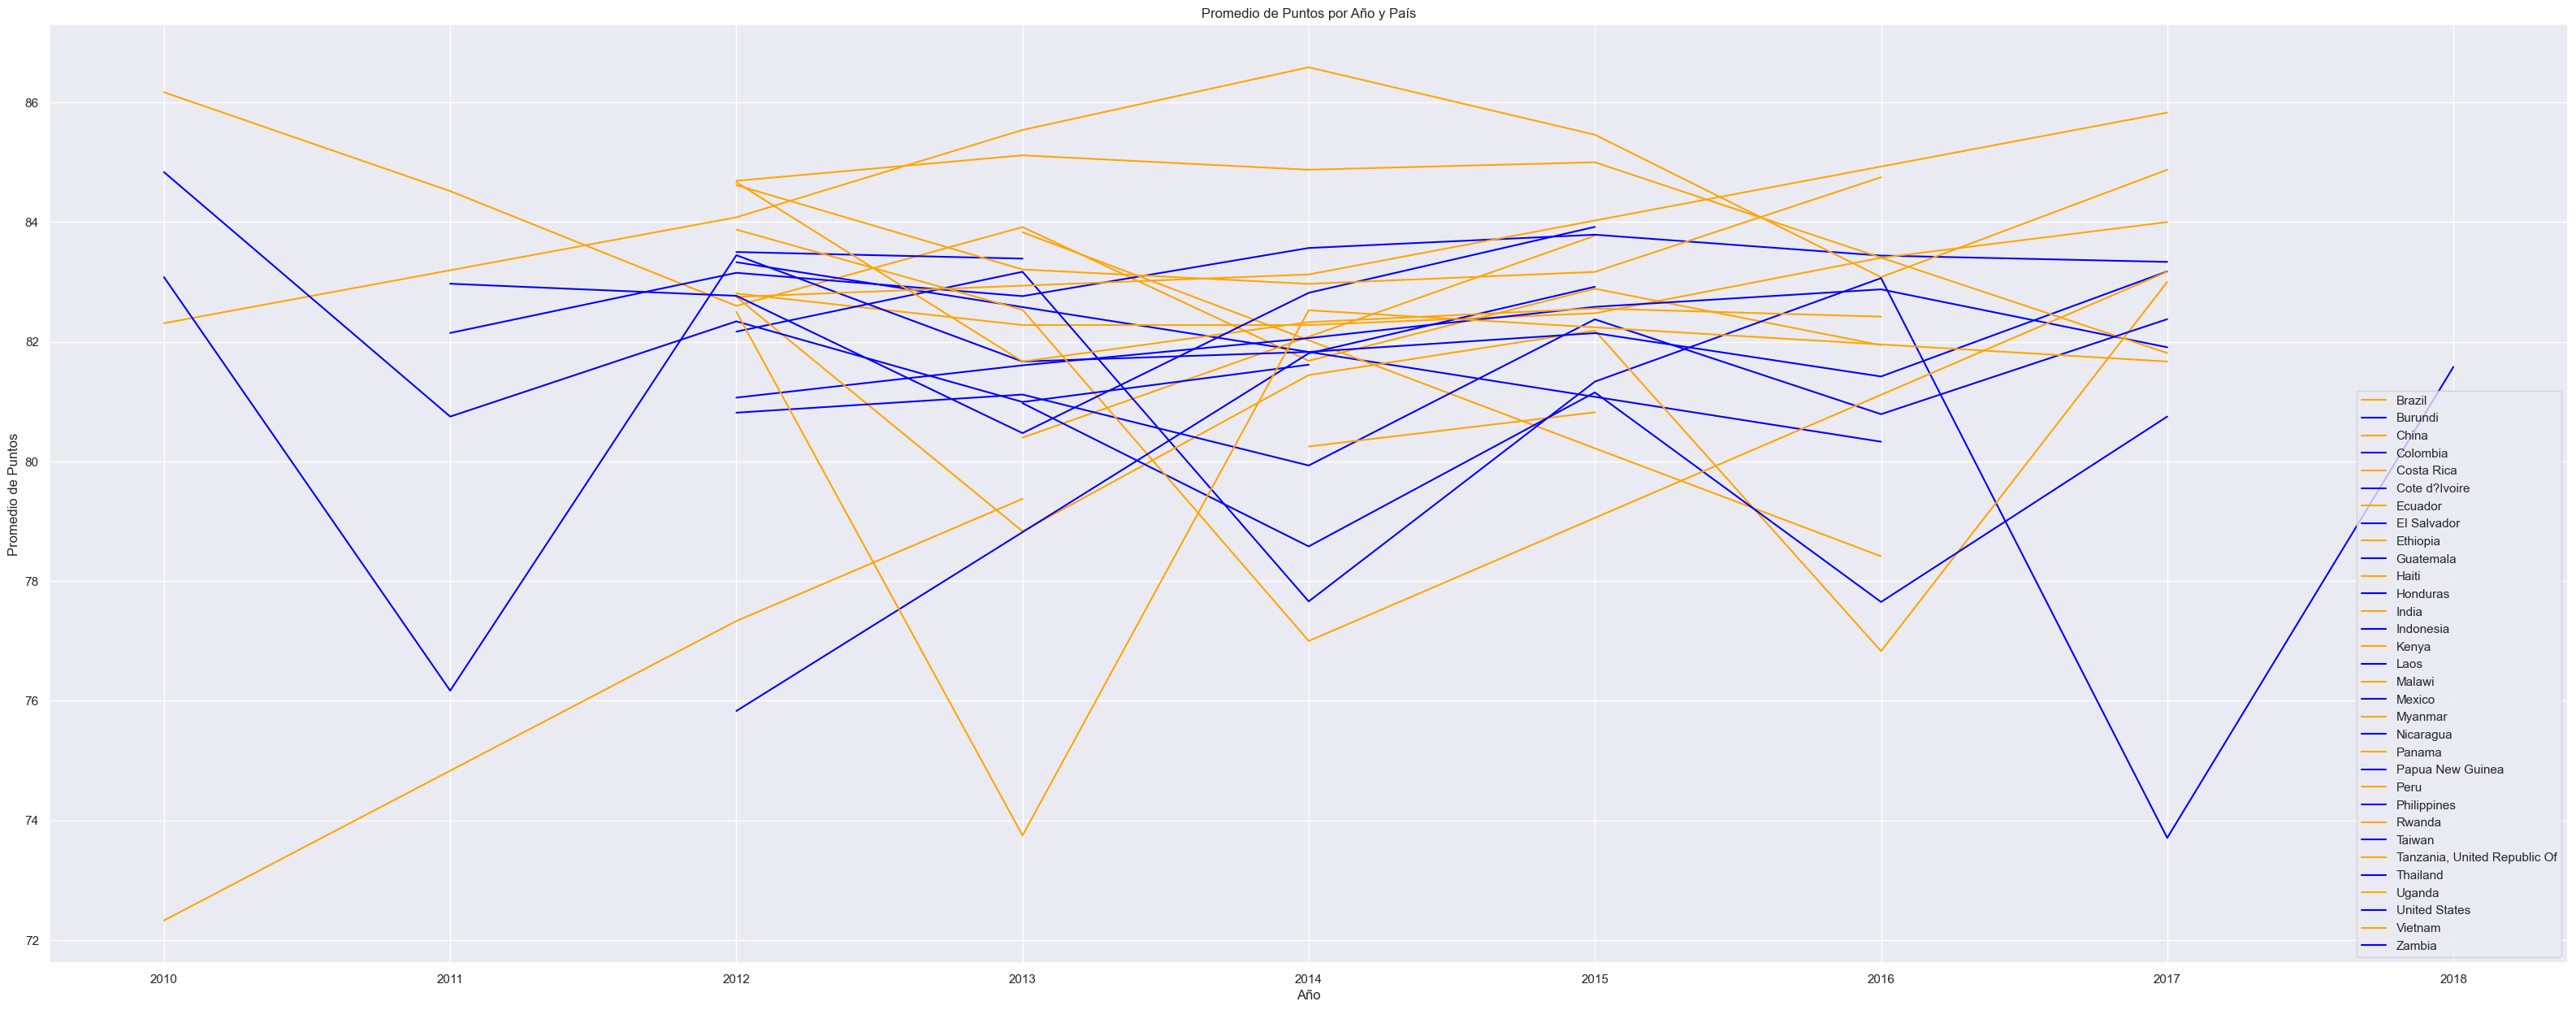

In [163]:
# Crear el gráfico de líneas
plt.figure(figsize=(40,15))
for pais in promedios['Country'].unique():
    datos_pais = promedios[promedios['Country'] == pais]
    plt.plot(datos_pais['Year'], datos_pais['Score_Total'], label=pais)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Promedio de Puntos')
plt.title('Promedio de Puntos por Año y País')
plt.legend()

# Mostrar el gráfico
plt.show()

In [164]:
df_quality.head(1)

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Total_Specialty_coffee,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
0,United States,2010,kona pacific farmers cooperative,Arabica,NaN,Unknown,25,45.3592,1133.98,8.25,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.0,86.25


In [165]:
# Para la correlación, hemos creado un nuevo data frame que compare los valores cualitativos
df_corr = df_quality[["Country", "Production_Bag","KG_x_Bag","Total_Specialty_coffee","Score_Aroma","Score_Flavor","Score_Aftertaste",
                      "Score_Acidity","Score_Body","Score_Balance","Score_Uniformity","Score_Sweetness"]]
correlacion=df_corr.groupby('Country').corr()
print(correlacion)

                                Production_Bag  KG_x_Bag   
Country                                                    
Brazil  Production_Bag                1.000000 -0.035638  \
        KG_x_Bag                     -0.035638  1.000000   
        Total_Specialty_coffee        0.889213  0.323037   
        Score_Aroma                  -0.315780  0.222906   
        Score_Flavor                 -0.247150  0.226821   
...                                        ...       ...   
Zambia  Score_Acidity                      NaN       NaN   
        Score_Body                         NaN       NaN   
        Score_Balance                      NaN       NaN   
        Score_Uniformity                   NaN       NaN   
        Score_Sweetness                    NaN       NaN   

                                Total_Specialty_coffee  Score_Aroma   
Country                                                               
Brazil  Production_Bag                        0.889213    -0.315780  \
      

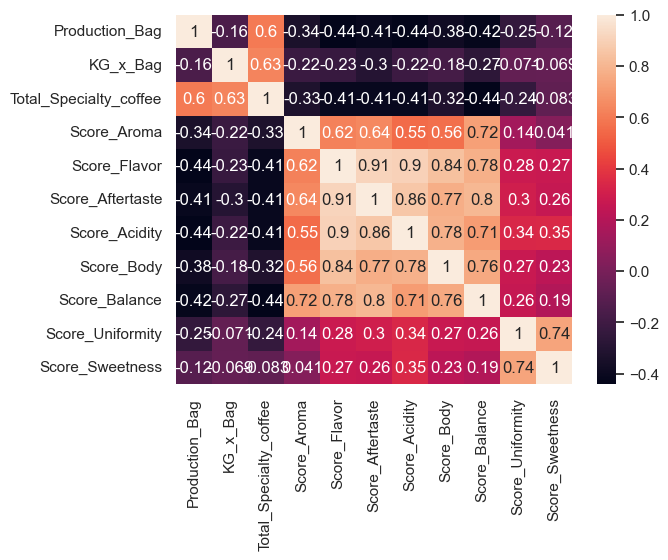

<Figure size 4000x8000 with 0 Axes>

In [166]:
sns.heatmap(correlacion.corr(),annot=True)
plt.figure(figsize=(40,80))
plt.show()

### Añadimos la BD con la prodcucción mundial de cafés desde 1990 hasta 2020. 

In [167]:
df_produccion_mundial=pd.read_excel('./1a - Total production (1).xlsx')

c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [168]:
df_pro_mundo=pd.DataFrame(df_produccion_mundial)
df_pro_mundo.head(6)

,Conuntry,Variety,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Angola,(R/A),50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,...,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,41.9027,51.8419
1,Bolivia,(A),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,...,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687,81.2654
2,Brazil,(A/R),27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8179,65130.7997,58210.7127
3,Burundi,(A/R),487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,...,352.9776,204.1328,405.9615,163.2177,247.5500,269.4576,196.4128,202.1079,204.3391,272.4688
4,Cameroon,(R/A),1682.4840,1725.9480,260.3760,682.9130,405.557,660.0400,1432.189,888.942,...,527.1347,669.3245,371.0197,403.8311,483.1051,390.8379,291.8761,369.5529,309.5907,268.2090
5,Central African Republic,(R),175.2740,124.7810,133.8450,165.5740,249.512,108.0650,207.831,114.354,...,78.4620,91.3250,22.8900,90.1040,62.6140,100.0180,36.7267,59.9140,37.1350,55.1383


In [169]:
df_pro_mundo = df_pro_mundo.rename(columns={'Conuntry': 'Country'})

In [170]:
# Los datos de producción se encuentran en sacos de 60kg, los transformamos a kg para obtener el total de producción a través de una función 

def total_kg (kilos):
    return kilos * 60

columnas_kg=df_pro_mundo.columns[2:]
df_pro_mundo[columnas_kg]= df_pro_mundo[columnas_kg].applymap(total_kg).round(2)
df_pro_mundo.head()
    



,Country,Variety,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Angola,(R/A),3020.70,4759.86,4651.20,1956.48,4608.12,3726.54,4255.50,3859.80,...,2098.20,1722.90,1967.40,2096.10,2364.30,2430.90,2689.80,2100.36,2514.16,3110.51
1,Bolivia,(A),7366.62,6212.16,7214.10,3049.38,7016.64,8549.10,7474.74,8443.14,...,7033.49,7910.12,6316.87,7194.73,5992.60,5053.15,4679.01,5028.67,4954.12,4875.92
2,Brazil,(A/R),1637137.72,1637609.60,2076201.25,1690018.72,1691522.82,1083612.13,1751804.58,1568880.24,...,3325704.61,2915509.73,3325080.07,3281337.98,3198286.01,3172235.26,3407290.70,3164389.07,3907847.98,3492642.76
3,Burundi,(A/R),29243.58,40031.94,37214.28,23601.24,39848.58,26038.80,24058.14,14987.10,...,21178.66,12247.97,24357.69,9793.06,14853.00,16167.46,11784.77,12126.47,12260.35,16348.13
4,Cameroon,(R/A),100949.04,103556.88,15622.56,40974.78,24333.42,39602.40,85931.34,53336.52,...,31628.08,40159.47,22261.18,24229.87,28986.31,23450.27,17512.57,22173.17,18575.44,16092.54


In [171]:
# Procedemos a eliminar las columnas que no necesitamos: Desde 1990 hasta 2009
columnas1990_2009= df_pro_mundo.columns[2:22]
df_pro_mundo=df_pro_mundo.drop(columnas1990_2009,axis=1)

In [172]:
# Eliminamos la última columna porque tampoco necesitamos esos datos
df_pro_mundo=df_pro_mundo.drop(df_pro_mundo.columns[-1],axis=1)

In [173]:
df_pro_mundo.head(2)

,Country,Variety,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,(R/A),2098.20,1722.90,1967.40,2096.10,2364.3,2430.90,2689.80,2100.36,2514.16
1,Bolivia,(A),7033.49,7910.12,6316.87,7194.73,5992.6,5053.15,4679.01,5028.67,4954.12


In [174]:
# Eliminanos las filas NaN
filas_eliminar=[55,57]
df_pro_mundo=df_pro_mundo.drop(filas_eliminar)

In [175]:
df_pro_mundo.head()

,Country,Variety,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,(R/A),2098.20,1722.90,1967.40,2096.10,2364.30,2430.90,2689.80,2100.36,2514.16
1,Bolivia,(A),7033.49,7910.12,6316.87,7194.73,5992.60,5053.15,4679.01,5028.67,4954.12
2,Brazil,(A/R),3325704.61,2915509.73,3325080.07,3281337.98,3198286.01,3172235.26,3407290.70,3164389.07,3907847.98
3,Burundi,(A/R),21178.66,12247.97,24357.69,9793.06,14853.00,16167.46,11784.77,12126.47,12260.35
4,Cameroon,(R/A),31628.08,40159.47,22261.18,24229.87,28986.31,23450.27,17512.57,22173.17,18575.44


### Añadiremos estos datos al DF de calidad para comparar la producción de cafés especiales vs la producción total de café por año
* ¿Concatenamos por país y por año?


In [176]:
df_pro_mundo.head(1)

,Country,Variety,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,(R/A),2098.2,1722.9,1967.4,2096.1,2364.3,2430.9,2689.8,2100.36,2514.16


In [177]:
df_quality.head(1)

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Total_Specialty_coffee,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
0,United States,2010,kona pacific farmers cooperative,Arabica,NaN,Unknown,25,45.3592,1133.98,8.25,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.0,86.25


In [178]:
import statsmodels.api as sm

In [179]:
df_quality.head()

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Total_Specialty_coffee,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
0,United States,2010,kona pacific farmers cooperative,Arabica,NaN,Unknown,25,45.3592,1133.98,8.25,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.00,86.25
1,Brazil,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,Unknown,300,60.0000,18000.00,8.17,7.92,7.92,7.75,8.33,8.00,10.0,10.0,0.08,86.17
2,Brazil,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,Unknown,300,60.0000,18000.00,8.42,7.92,8.00,7.75,7.92,8.00,10.0,10.0,0.01,86.17
3,Ethiopia,2010,ethiopia commodity exchange,Arabica,NaN,Unknown,360,6.0000,2160.00,7.67,8.00,7.83,8.00,7.92,7.83,10.0,10.0,0.00,85.08
4,Ethiopia,2010,ethiopia commodity exchange,Arabica,NaN,Unknown,300,6.0000,1800.00,7.58,7.83,7.58,8.00,7.83,7.50,10.0,10.0,0.10,83.83


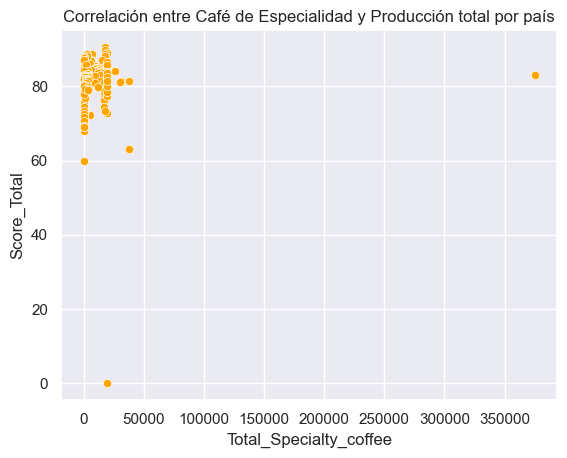

In [180]:
sns.scatterplot(x='Total_Specialty_coffee', y='Score_Total', data=df_quality)
plt.title('Correlación entre Café de Especialidad y Producción total por país')
plt.show()

### Generamos un data frame con la producción de cafés especiales por país y por año para poder compararlo con la producción total 

In [181]:
df_quality.head(1)

,Country,Year,Owner,Species,Variety,Color,Production_Bag,KG_x_Bag,Total_Specialty_coffee,Score_Aroma,Score_Flavor,Score_Aftertaste,Score_Acidity,Score_Body,Score_Balance,Score_Uniformity,Score_Sweetness,Score_Moisture,Score_Total
0,United States,2010,kona pacific farmers cooperative,Arabica,NaN,Unknown,25,45.3592,1133.98,8.25,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.0,86.25


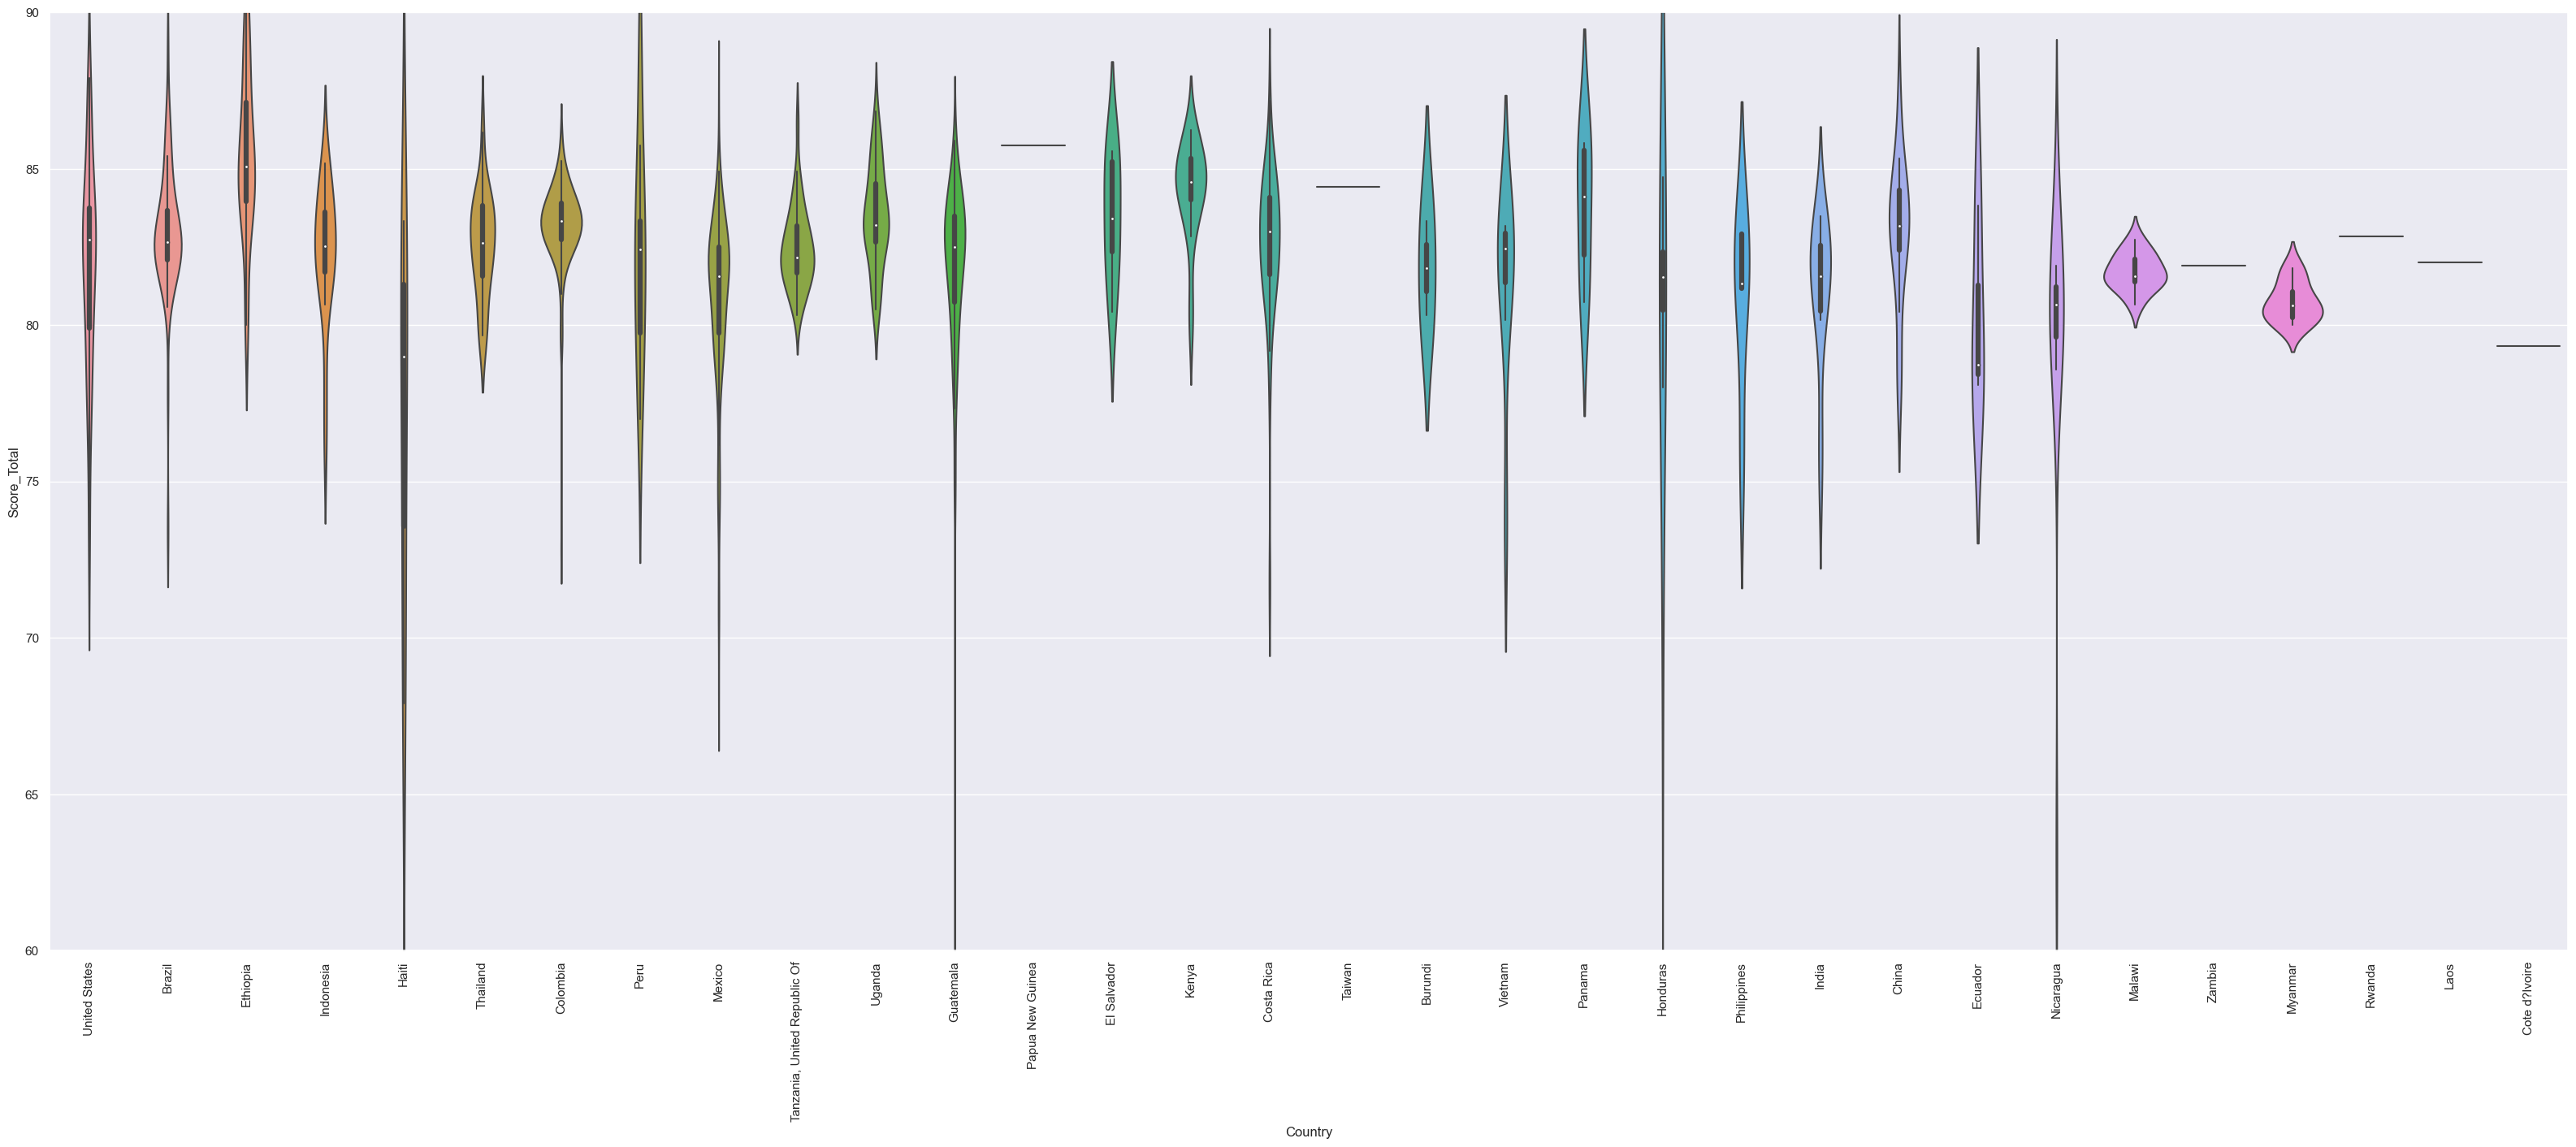

In [182]:
sns.set(style="darkgrid")
plt.figure(figsize=(40,15))
sns.violinplot(x=df_quality["Country"], y=df_quality["Score_Total"],shade=True)
plt.xticks(rotation=90)
plt.ylim(60,90)
plt.show()



In [183]:
production_quality= df_quality[['Country','Year','Total_Specialty_coffee']]
production_quality.head(1)

,Country,Year,Total_Specialty_coffee
0,United States,2010,1133.98


In [184]:
# Ordenamos por país 
production_quality= production_quality.sort_values('Country')

In [185]:
production_world_quality= production_quality.groupby(['Country','Year'])['Total_Specialty_coffee'].sum().reset_index().round(2)
production_world_quality.head(5)

,Country,Year,Total_Specialty_coffee
0,Brazil,2010,36000.00
1,Brazil,2011,30000.00
2,Brazil,2012,40860.00
3,Brazil,2013,3302.27
4,Brazil,2014,72612.27


In [186]:
df_pro_mundo.head(2)

,Country,Variety,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,(R/A),2098.20,1722.90,1967.40,2096.10,2364.3,2430.90,2689.80,2100.36,2514.16
1,Bolivia,(A),7033.49,7910.12,6316.87,7194.73,5992.6,5053.15,4679.01,5028.67,4954.12


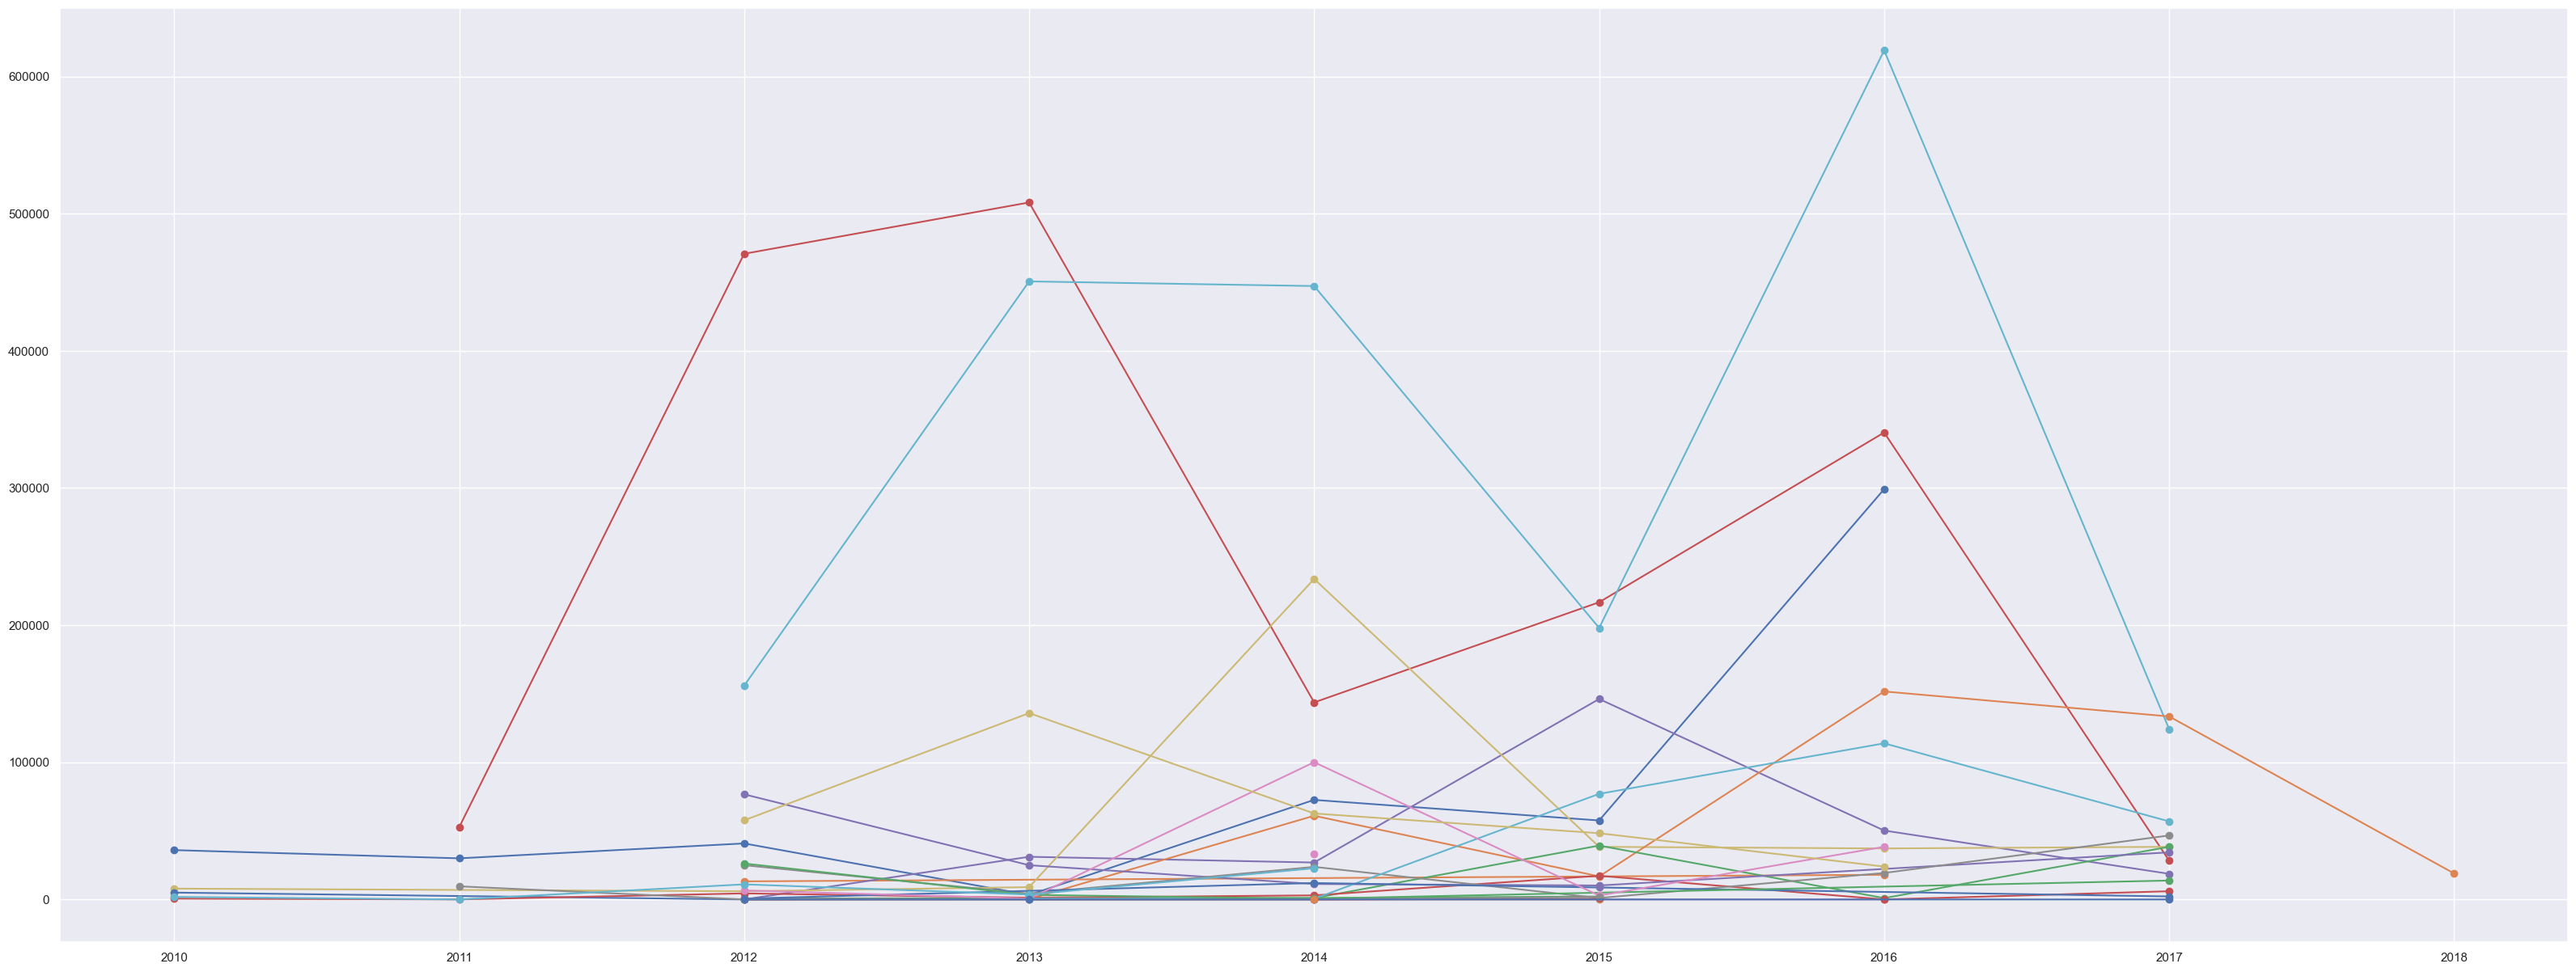

In [187]:

plt.figure(figsize=(40,15))
for pais in production_world_quality['Country'].unique():
    datos_pais = production_world_quality[production_world_quality['Country'] == pais]
    plt.plot(datos_pais['Year'], datos_pais['Total_Specialty_coffee'], label=pais,marker='o')

In [188]:
df_pro_mundo.head()

,Country,Variety,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,(R/A),2098.20,1722.90,1967.40,2096.10,2364.30,2430.90,2689.80,2100.36,2514.16
1,Bolivia,(A),7033.49,7910.12,6316.87,7194.73,5992.60,5053.15,4679.01,5028.67,4954.12
2,Brazil,(A/R),3325704.61,2915509.73,3325080.07,3281337.98,3198286.01,3172235.26,3407290.70,3164389.07,3907847.98
3,Burundi,(A/R),21178.66,12247.97,24357.69,9793.06,14853.00,16167.46,11784.77,12126.47,12260.35
4,Cameroon,(R/A),31628.08,40159.47,22261.18,24229.87,28986.31,23450.27,17512.57,22173.17,18575.44


### Como ambos data frame tenían una estructura distinta, los unimos a través de un for 

In [189]:
# Añadimos la columna con la producción mundial
for index, row in production_world_quality.iterrows():
    country = row['Country']
    year = row['Year']
    
    # Verificamos si el país y el año existen en df_pro_mundo
    if (df_pro_mundo['Country'] == country).any() and str(year) in df_pro_mundo.columns:
        production_world_quality.loc[index, 'Total_Production'] = df_pro_mundo.loc[df_pro_mundo['Country'] == country, str(year)].values[0]


In [190]:
production_world_quality.head(2)

,Country,Year,Total_Specialty_coffee,Total_Production
0,Brazil,2010,36000.0,3325704.61
1,Brazil,2011,30000.0,2915509.73


### Eliminar los nulos 

In [191]:
production_world_quality[production_world_quality['Total_Production'].isna()]

,Country,Year,Total_Specialty_coffee,Total_Production
9,China,2013,38.00,NaN
10,China,2015,2160.00,NaN
24,Cote d?Ivoire,2016,2.00,NaN
71,Laos,2015,2.00,NaN
79,Myanmar,2014,2.00,NaN
80,Myanmar,2015,17.00,NaN
98,Taiwan,2012,4.00,NaN
99,"Tanzania, United Republic Of",2012,6600.00,NaN
100,"Tanzania, United Republic Of",2013,600.00,NaN
101,"Tanzania, United Republic Of",2014,100080.00,NaN


In [192]:
# Cambiamos el nombre de Tannzania
fila=99,100,101,102,103
columna='Country'
nuevo_nombre='Tanzania'
production_world_quality.at[fila,columna]=nuevo_nombre

In [193]:
fila=24
columna='Country'
nuevo_nombre='Cote d Ivoire'
production_world_quality.at[fila,columna]=nuevo_nombre

In [194]:
df_pro_mundo.head(1)

,Country,Variety,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,(R/A),2098.2,1722.9,1967.4,2096.1,2364.3,2430.9,2689.8,2100.36,2514.16


In [195]:
# Sumamos todas las columnas para obtener el total por año 
suma_total = df_pro_mundo.iloc[:, 2:].sum()
df_suma = pd.DataFrame([suma_total], columns=df_pro_mundo.columns[2:])

# Concatenar el DataFrame original con la fila de suma
df_con_suma = pd.concat([df_pro_mundo, df_suma], axis=0, ignore_index=True)

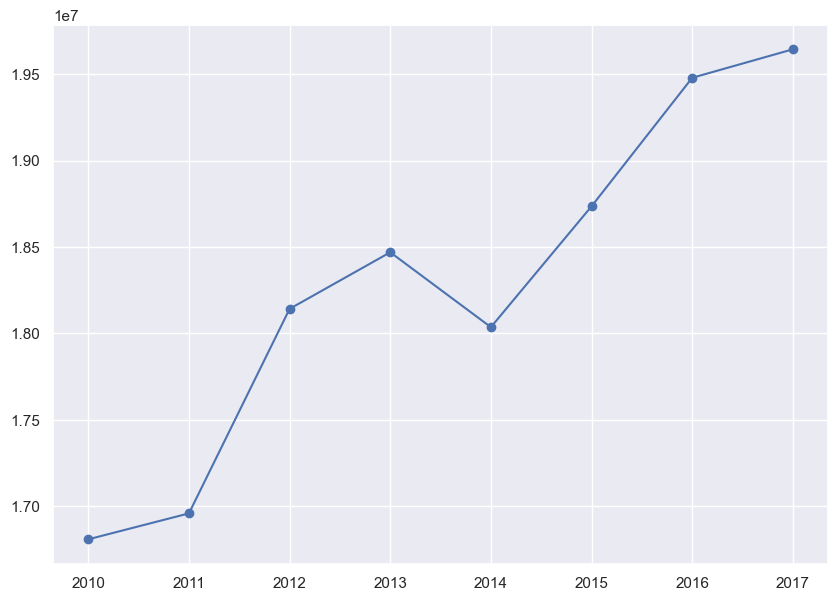

In [196]:
ultima_fila = df_con_suma.iloc[-1, 2:-1]
columnas = df_con_suma.columns[2:-1]
plt.figure(figsize=(10, 7))
plt.plot(columnas,ultima_fila,marker='o', linestyle='-', color='b')

plt.show()

In [197]:
production_world_quality[production_world_quality['Total_Production'].isna()]

,Country,Year,Total_Specialty_coffee,Total_Production
9,China,2013,38.00,NaN
10,China,2015,2160.00,NaN
24,Cote d Ivoire,2016,2.00,NaN
71,Laos,2015,2.00,NaN
79,Myanmar,2014,2.00,NaN
80,Myanmar,2015,17.00,NaN
98,Taiwan,2012,4.00,NaN
99,Tanzania,2012,6600.00,NaN
100,Tanzania,2013,600.00,NaN
101,Tanzania,2014,100080.00,NaN


In [198]:
# Sustituidos los nombres, volvemos a realizar la búsqueda para incluir los valores que faltan, 
# luego los NaN restantes los sustituiremos por la producción promedio del país en el periodo estudiado

for index, row in production_world_quality.iterrows():
    country = row['Country']
    year = row['Year']

    if country in df_pro_mundo['Country'].values:
        production_world = df_pro_mundo.loc[df_pro_mundo['Country'] == country, str(year)].values[0]
    else:
        # Si el país no está presente en el DataFrame de origen, asignar un valor predeterminado, como NaN o 0.
        production_world = None
    
    # Asignar el valor encontrado en la columna "Production_World" de la fila actual en el DataFrame de destino.
    production_world_quality.at[index, 'Total_Production'] = production_world


In [199]:
production_world_quality[production_world_quality['Total_Production'].isna()]

,Country,Year,Total_Specialty_coffee,Total_Production
9,China,2013,38.00,NaN
10,China,2015,2160.00,NaN
71,Laos,2015,2.00,NaN
79,Myanmar,2014,2.00,NaN
80,Myanmar,2015,17.00,NaN
98,Taiwan,2012,4.00,NaN
114,United States,2010,1853.98,NaN
115,United States,2011,2.72,NaN
116,United States,2012,11031.57,NaN
117,United States,2013,3581.11,NaN


In [200]:
production_world_quality

,Country,Year,Total_Specialty_coffee,Total_Production
0,Brazil,2010,36000.00,3325704.61
1,Brazil,2011,30000.00,2915509.73
2,Brazil,2012,40860.00,3325080.07
3,Brazil,2013,3302.27,3281337.98
4,Brazil,2014,72612.27,3198286.01
...,...,...,...,...
119,Vietnam,2012,4.00,1404126.34
120,Vietnam,2013,2.27,1656586.88
121,Vietnam,2014,12.00,1634431.31
122,Vietnam,2017,4.00,2005949.94


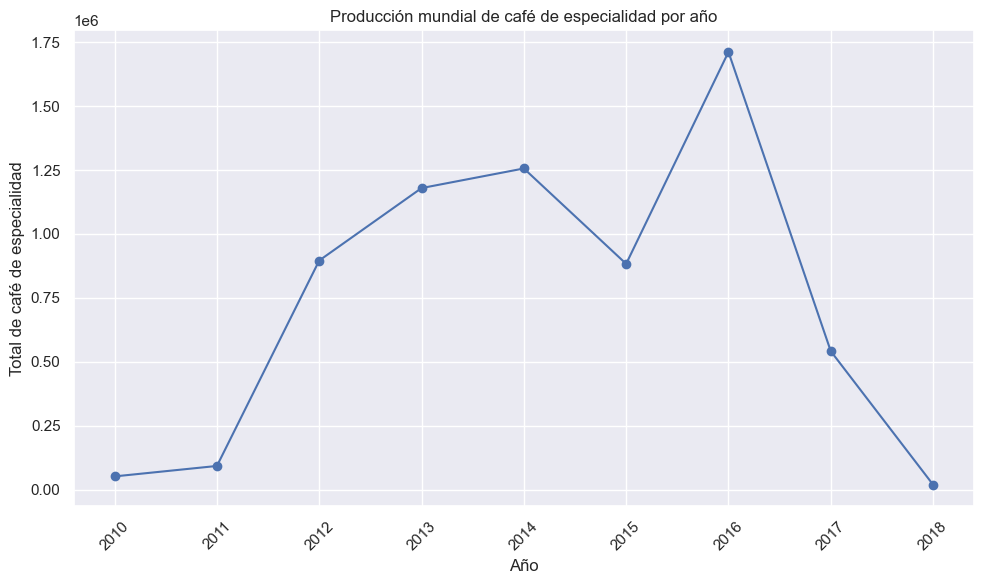

In [201]:

production_world_quality = production_world_quality.sort_values(by='Year')

# Agrupar los datos por año y calcular la suma del total de café de especialidad para cada año
grouped_data = production_world_quality.groupby('Year')['Total_Specialty_coffee'].sum().reset_index()

years = grouped_data['Year']
total_specialty_coffee = grouped_data['Total_Specialty_coffee']

plt.figure(figsize=(10, 6))  

plt.plot(years, total_specialty_coffee, marker='o', linestyle='-', color='b')

plt.title('Producción mundial de café de especialidad por año')
plt.xlabel('Año')
plt.ylabel('Total de café de especialidad')
plt.grid(True)

plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad

plt.tight_layout()  # Ajustar el diseño para evitar recortar etiquetas

# Mostrar el gráfico
plt.show()



In [202]:
# Guardamos el cuadro en un nuevo csv como respaldo
production_world_quality.to_csv('Quality_VS_Production.csv', index=False)

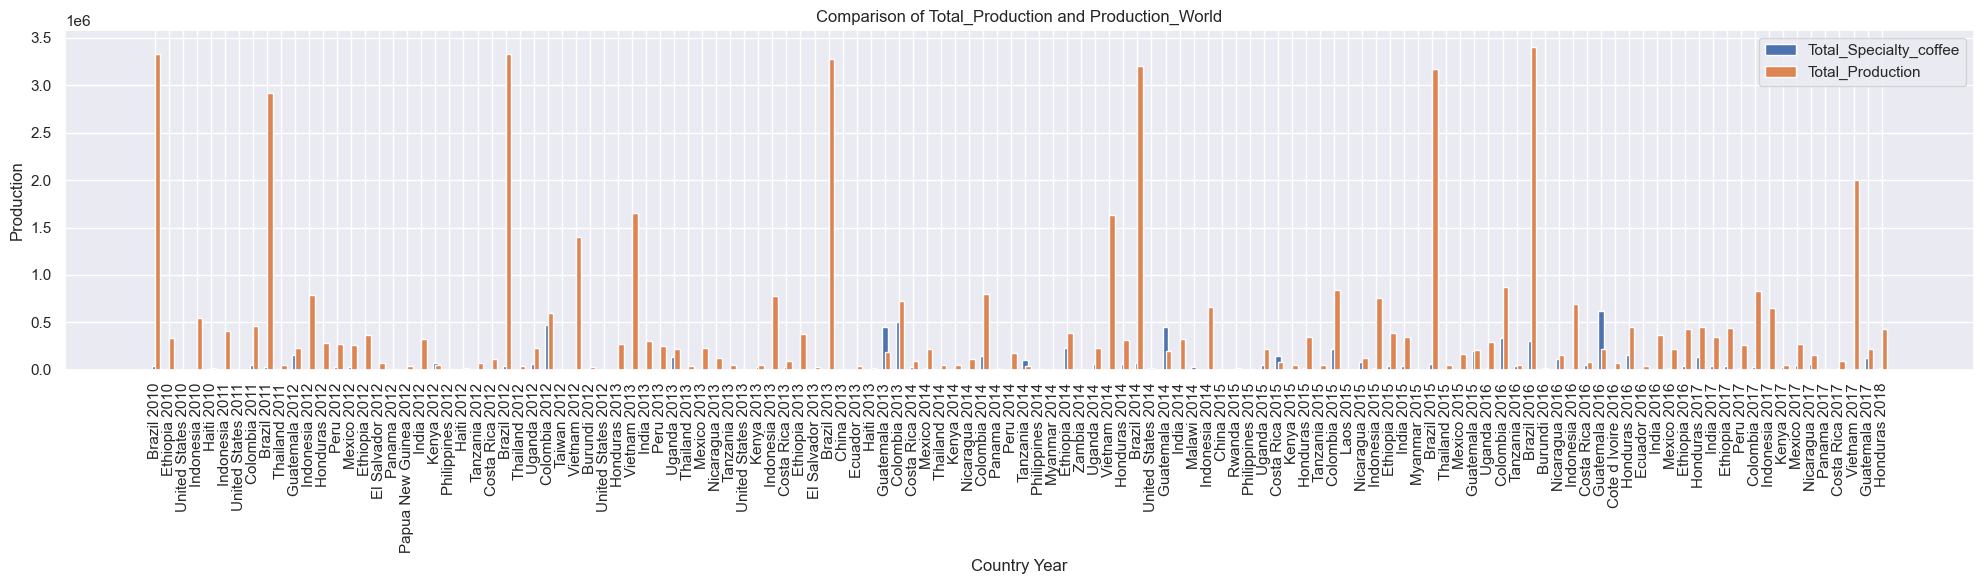

In [203]:
# Crear el gráfico de barras
plt.figure(figsize=(20, 6))

# Datos para el eje x (combinación de 'Country' y 'Year')
x_labels = production_world_quality['Country'] + ' ' + production_world_quality['Year'].astype(str)

# Datos para las barras
total_production = production_world_quality['Total_Specialty_coffee']
production_world = production_world_quality['Total_Production']

# Crear las barras
plt.bar(x_labels, total_production, label='Total_Specialty_coffee', width=0.4, align='center')
plt.bar(x_labels, production_world, label='Total_Production', width=0.4, align='edge')

# Personalizar el gráfico
plt.xlabel('Country Year')
plt.ylabel('Production')
plt.title('Comparison of Total_Production and Production_World')
plt.xticks(rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

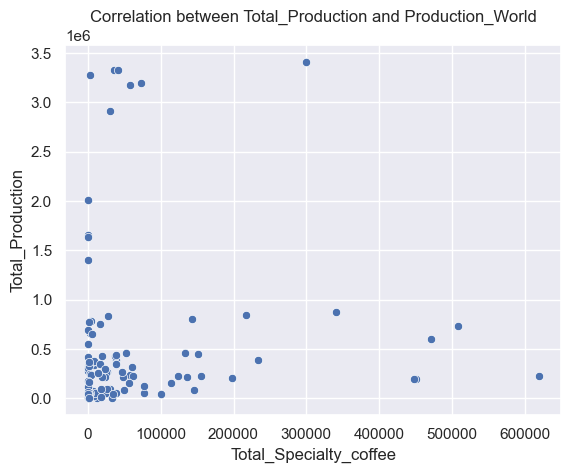

In [204]:
# Crear el gráfico de correlación
sns.scatterplot(x='Total_Specialty_coffee', y='Total_Production', data=production_world_quality)
plt.title('Correlation between Total_Production and Production_World')
plt.show()

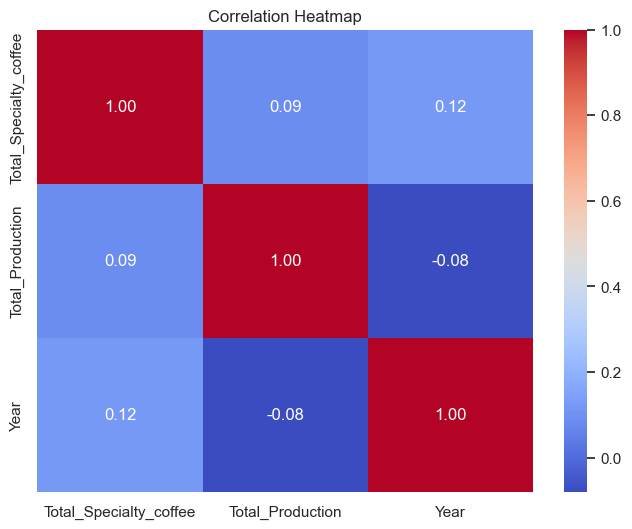

In [205]:
# Calcular la matriz de correlación
correlation_matrix = production_world_quality[['Total_Specialty_coffee', 'Total_Production','Year']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

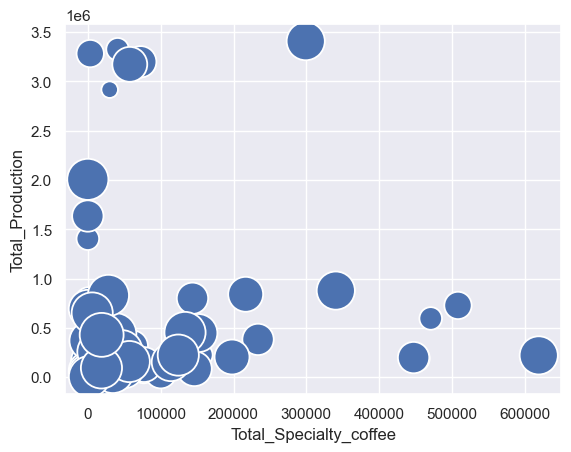

In [206]:
sns.scatterplot(data=production_world_quality, x="Total_Specialty_coffee", y="Total_Production", size="Year", legend=False, sizes=(20, 1000))
plt.show()

## Realizamos un test de Hipotesis para verificar la Hipotesis Nula 

In [207]:
from scipy.stats import spearmanr
from scipy.stats import wilcoxon
from scipy.stats import kendalltau

In [208]:
production_world_quality.isna().sum()

Country                    0
Year                       0
Total_Specialty_coffee     0
Total_Production          11
dtype: int64

In [209]:
production_world_quality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 124 non-null    object 
 1   Year                    124 non-null    int64  
 2   Total_Specialty_coffee  124 non-null    float64
 3   Total_Production        113 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB


In [210]:
production_world_quality['Country'].nunique()

32

In [211]:
# Eliminamos los países en los cuales no tenemos la producción mundial para poder realizar los test de hipotesis
production_world_quality.dropna(subset=['Total_Production'], inplace=True)

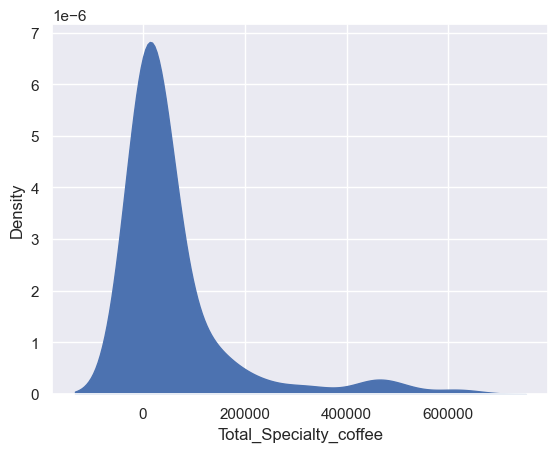

In [212]:
sns.kdeplot(data=production_world_quality, x="Total_Specialty_coffee",  fill=True, alpha=1)
plt.show()

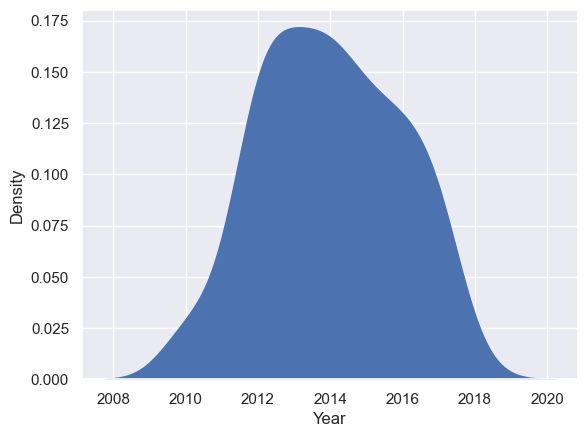

In [213]:
sns.kdeplot(data=production_world_quality, x="Year",  fill=True, alpha=1)
plt.show()

In [214]:
production_world_quality.isna().sum()

Country                   0
Year                      0
Total_Specialty_coffee    0
Total_Production          0
dtype: int64

In [215]:
wilcoxon(production_world_quality.Total_Specialty_coffee,production_world_quality.Total_Production)

WilcoxonResult(statistic=340.0, pvalue=1.5552518626156703e-16)

In [216]:
spearmanr(production_world_quality.Total_Production,production_world_quality.Total_Specialty_coffee)# Añadir la biblioteca

SignificanceResult(statistic=0.2775817297525635, pvalue=0.002914131539632695)

In [217]:
kendalltau(production_world_quality.Total_Specialty_coffee,production_world_quality.Total_Production)

SignificanceResult(statistic=0.18714409964749032, pvalue=0.003354636819726005)

In [218]:
from scipy.stats import ttest_ind

# Filtramos las muestras de producción de café y café de especialidad
produccion_cafe = production_world_quality['Total_Production']
produccion_especialidad = production_world_quality['Total_Specialty_coffee']

# Realizar el t-test de dos colas
t_statistic, p_value = ttest_ind(produccion_cafe, produccion_especialidad)

# Mostrar el resultado
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 5.602774158187254
P-value: 6.158734669932221e-08


In [219]:
from scipy.stats import shapiro, levene, probplot

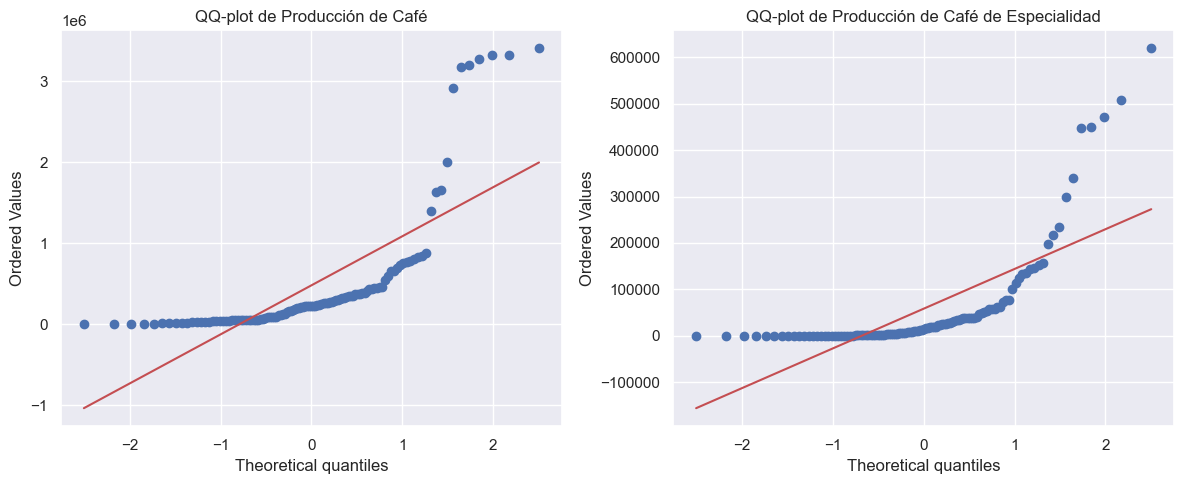

Prueba de normalidad (Shapiro-Wilk) - P-value para Producción de Café: 1.2924622955758173e-16
Prueba de normalidad (Shapiro-Wilk) - P-value para Producción de Café de Especialidad: 5.587507761355666e-17


In [220]:
produccion_cafe = production_world_quality['Total_Production']
produccion_especialidad = production_world_quality['Total_Specialty_coffee']

# Gráfico QQ-plot para comprobar la normalidad
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
probplot(produccion_cafe, plot=plt)
plt.title('QQ-plot de Producción de Café')

plt.subplot(1, 2, 2)
probplot(produccion_especialidad, plot=plt)
plt.title('QQ-plot de Producción de Café de Especialidad')

plt.tight_layout()
plt.show()

# Prueba de normalidad Shapiro-Wilk
shapiro_cafe_pvalue = shapiro(produccion_cafe)[1]
shapiro_especialidad_pvalue = shapiro(produccion_especialidad)[1]

print("Prueba de normalidad (Shapiro-Wilk) - P-value para Producción de Café:", shapiro_cafe_pvalue)
print("Prueba de normalidad (Shapiro-Wilk) - P-value para Producción de Café de Especialidad:", shapiro_especialidad_pvalue)


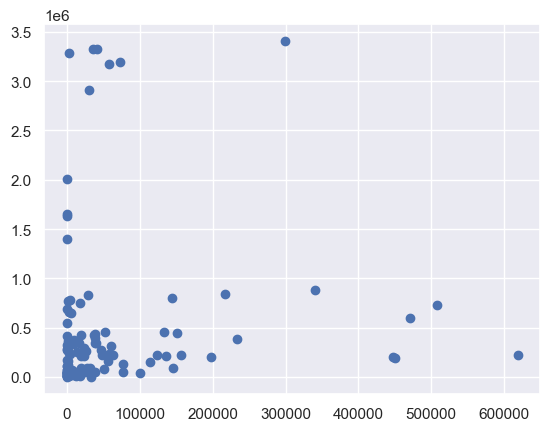

In [221]:
plt.scatter(production_world_quality.Total_Specialty_coffee,production_world_quality.Total_Production)

In [222]:
production_world_quality.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,113.0,2014.000000,1.917960,2010.00,2012.00,2014.00,2016.00,2018.0
Total_Specialty_coffee,113.0,58322.778496,114183.219372,2.00,600.00,13800.00,50255.00,619053.0
Total_Production,113.0,479870.729027,791610.512093,156.67,50693.23,224023.57,429172.82,3407290.7


In [223]:
estadisticas= production_world_quality[['Total_Specialty_coffee','Total_Production']].describe()

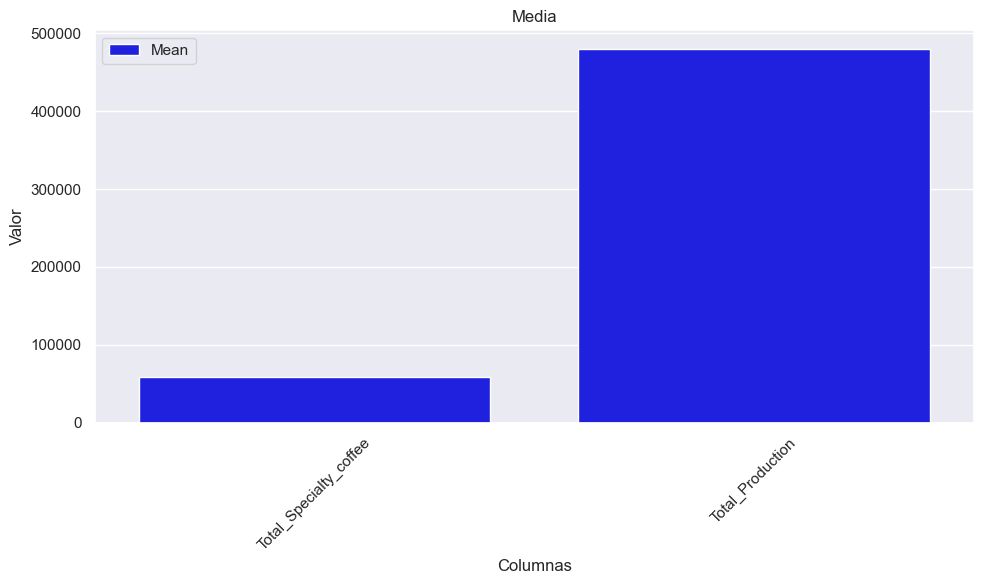

In [224]:
# Gráfica de barras utilizando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=estadisticas.columns, y=estadisticas.loc["mean"], color='blue', label='Mean')
plt.xlabel('Columnas')
plt.ylabel('Valor')
plt.title('Media')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Análisamos los 3 países productores de café para poder ver de forma más facil el comportamiento de la producción total de café y el café de 
* Brazil
* Colombia
* Etiopia

In [225]:
analisis_paises=production_world_quality

#### Añadimos una nueva columan para conocer el peso porcentual del café de especialidad sobre la producción mundial 

In [251]:
promedios.head(1)

,Country,Year,Score_Total
0,Brazil,2010,86.17


In [280]:
promedios[promedios['Country']=='Brazil']

,Country,Year,Score_Total
0,Brazil,2010,86.170000
1,Brazil,2011,84.517857
2,Brazil,2012,82.600667
3,Brazil,2013,83.916667
4,Brazil,2014,81.681667
5,Brazil,2015,82.886667
6,Brazil,2016,81.943889


In [226]:
analisis_paises.head(1)

,Country,Year,Total_Specialty_coffee,Total_Production
0,Brazil,2010,36000.0,3325704.61


In [227]:
analisis_paises['% Specialty Coffee']=(analisis_paises['Total_Specialty_coffee']/analisis_paises['Total_Production']* 100).round(2)

In [228]:
analisis_paises.head(2)

,Country,Year,Total_Specialty_coffee,Total_Production,% Specialty Coffee
0,Brazil,2010,36000.0,3325704.61,1.08
29,Ethiopia,2010,7920.0,333623.09,2.37


In [252]:
analisis_paises=pd.merge(analisis_paises,promedios[['Country','Year','Score_Total']], on=['Country', 'Year'], how='left')

In [256]:
analisis_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          113 non-null    object 
 1   Year                             113 non-null    int64  
 2   Total_Specialty_coffee           113 non-null    float64
 3   Total_Production                 113 non-null    float64
 4   % Specialty Coffee               113 non-null    float64
 5   %_Specialty_VS_Production_Total  113 non-null    float64
 6   Score_Total                      107 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.3+ KB


In [260]:
# No imputaremos estos valores ya que estos países no serán objeto de estudio durante este EDA

analisis_paises[analisis_paises['Score_Total'].isna()]

,Country,Year,Total_Specialty_coffee,Total_Production,% Specialty Coffee,%_Specialty_VS_Production_Total,Score_Total
16,Tanzania,2016,38400.0,50765.51,75.64,0.521436,NaN
28,Cote d Ivoire,2016,2.0,67044.27,0.00,0.000027,NaN
37,Tanzania,2015,2860.0,55810.32,5.12,0.041817,NaN
56,Tanzania,2014,100080.0,45160.11,221.61,1.178239,NaN
74,Tanzania,2013,600.0,48656.11,1.23,0.006873,NaN
98,Tanzania,2012,6600.0,69067.29,9.56,0.077490,NaN


In [253]:
analisis_paises.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,113.0,2014.000000,1.917960,2010.000000,2012.000000,2014.000000,2016.000000,2.018000e+03
Total_Specialty_coffee,113.0,58322.778496,114183.219372,2.000000,600.000000,13800.000000,50255.000000,6.190530e+05
Total_Production,113.0,479870.729027,791610.512093,156.670000,50693.230000,224023.570000,429172.820000,3.407291e+06
% Specialty Coffee,113.0,49.406283,216.123181,0.000000,0.570000,8.660000,33.420000,2.254160e+03
%_Specialty_VS_Production_Total,113.0,0.813068,1.477635,0.000023,0.008599,0.244423,0.781673,8.406153e+00
Score_Total,107.0,82.064179,2.562033,72.330000,81.511667,82.583571,83.362500,8.658800e+01


In [230]:
# Vemos la producción de Brazil 
Brazil= analisis_paises[analisis_paises['Country']=='Brazil']
Brazil

,Country,Year,Total_Specialty_coffee,Total_Production,% Specialty Coffee
0,Brazil,2010,36000.00,3325704.61,1.08
1,Brazil,2011,30000.00,2915509.73,1.03
2,Brazil,2012,40860.00,3325080.07,1.23
3,Brazil,2013,3302.27,3281337.98,0.10
4,Brazil,2014,72612.27,3198286.01,2.27
5,Brazil,2015,57600.00,3172235.26,1.82
6,Brazil,2016,299162.00,3407290.70,8.78


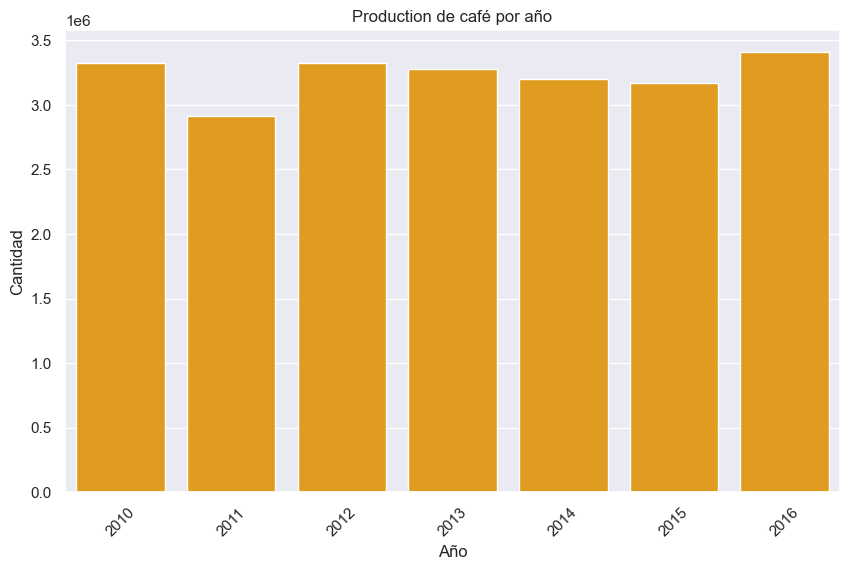

In [231]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total_Production', data=Brazil, color='orange', label='Production World')
plt.title('Production de café por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')


plt.xticks(rotation=45)  

plt.show()

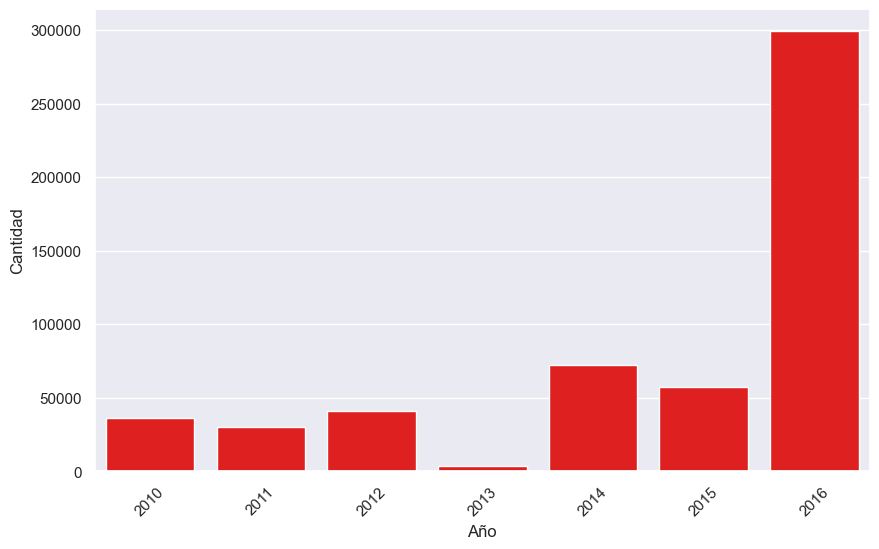

In [232]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total_Specialty_coffee', data=Brazil, color='red', label='Production World')
# plt.title('Production de café de especialidad por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')


plt.xticks(rotation=45)  

plt.show()

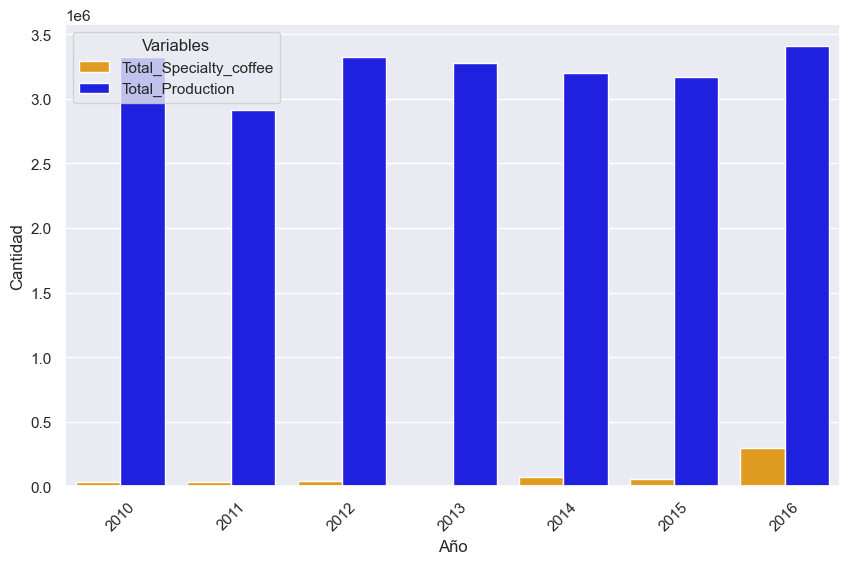

In [233]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

data = Brazil[['Year', 'Total_Specialty_coffee', 'Total_Production']]

# Apilamos los datos en el DataFrame para tener las dos variables en la misma columna
data = data.melt(id_vars='Year', var_name='Variable', value_name='Cantidad')

# Cambiar el orden de los colores para que 'Total_Specialty_coffee' se muestre en la parte superior
sns.set_palette(sns.color_palette(['orange', 'blue']))

# Crear el gráfico de barras agrupadas
sns.barplot(x='Year', y='Cantidad', hue='Variable', data=data)

# plt.title('Production de café por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

plt.xticks(rotation=45)

plt.legend(title='Variables', loc='upper left')

plt.show()


In [267]:
# Gráficamos la evolución de la puntuación por año de los cafés especiales para analizar su evolución y determinar si existe una tendencia

score_brazil=promedios[promedios['Country']=='Brazil']
score_brazil

,Country,Year,Score_Total
0,Brazil,2010,86.170000
1,Brazil,2011,84.517857
2,Brazil,2012,82.600667
3,Brazil,2013,83.916667
4,Brazil,2014,81.681667
5,Brazil,2015,82.886667
6,Brazil,2016,81.943889


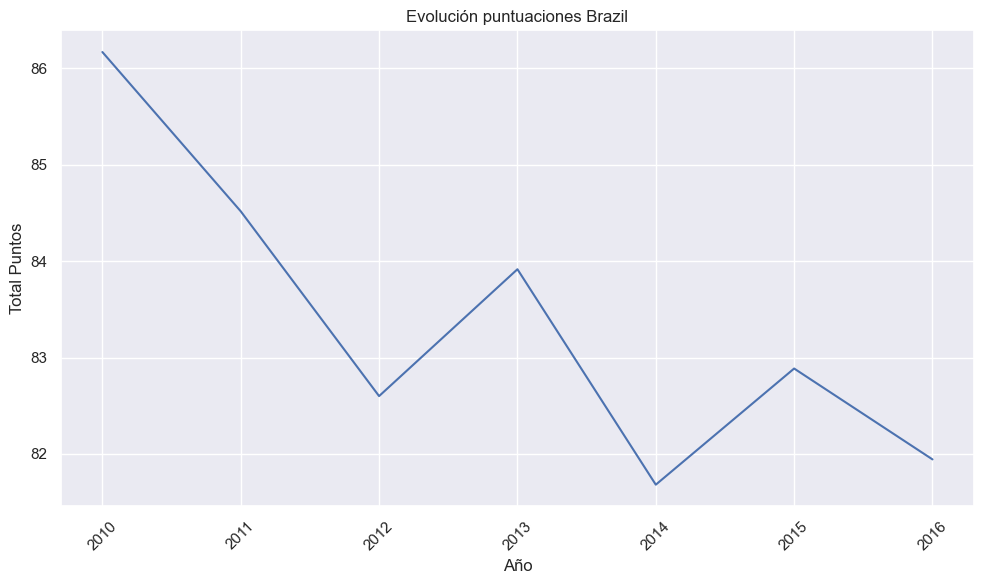

In [285]:
plt.figure(figsize=(10, 6))  

plt.plot(score_brazil['Year'], score_brazil['Score_Total'], color='b')

plt.title('Evolución puntuaciones Brazil')
plt.xlabel('Año')
plt.ylabel('Total Puntos')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

### Realizamos los test de hipotesis correspondientes a Brazil

In [234]:
wilcoxon(Brazil.Total_Specialty_coffee,Brazil.Total_Production)

WilcoxonResult(statistic=0.0, pvalue=0.015625)

In [235]:
spearmanr(Brazil.Total_Specialty_coffee,Brazil.Total_Production)

SignificanceResult(statistic=0.3214285714285715, pvalue=0.4820720382996776)

In [236]:
kendalltau(Brazil.Total_Specialty_coffee,Brazil.Total_Production)

SignificanceResult(statistic=0.23809523809523814, pvalue=0.5619047619047619)

### Estudiamos Colombia 

In [237]:
# Vemos la producción de Colombia
colombia= analisis_paises[analisis_paises['Country']=='Colombia']
colombia

,Country,Year,Total_Specialty_coffee,Total_Production,% Specialty Coffee
11,Colombia,2011,52621.00,459200.02,11.46
12,Colombia,2012,470752.00,595616.67,79.04
13,Colombia,2013,508186.73,727444.21,69.86
14,Colombia,2014,143676.81,800000.61,17.96
15,Colombia,2015,216702.00,840526.88,25.78
16,Colombia,2016,340450.00,878063.36,38.77
17,Colombia,2017,28280.00,829444.35,3.41


In [282]:
score_colombia=analisis_paises[analisis_paises['Country']=='Colombia']
score_colombia

,Country,Year,Total_Specialty_coffee,Total_Production,% Specialty Coffee,%_Specialty_VS_Production_Total,Score_Total
7,Colombia,2017,28280.00,829444.35,3.41,0.488818,83.335000
21,Colombia,2016,340450.00,878063.36,38.77,4.622989,83.440417
36,Colombia,2015,216702.00,840526.88,25.78,3.168438,83.789333
59,Colombia,2014,143676.81,800000.61,17.96,1.691502,83.567333
80,Colombia,2013,508186.73,727444.21,69.86,5.821190,82.762632
103,Colombia,2012,470752.00,595616.67,79.04,5.527046,83.152667
107,Colombia,2011,52621.00,459200.02,11.46,1.371081,82.147500


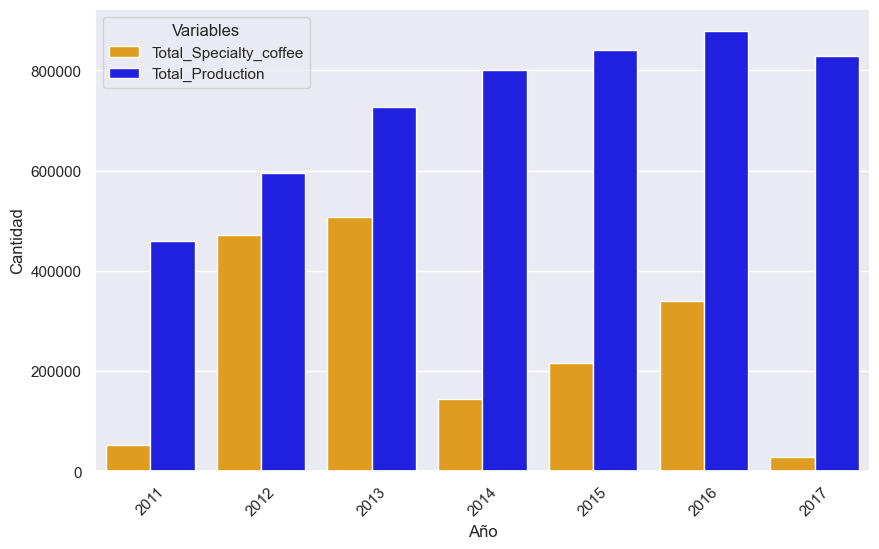

In [283]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

data = colombia[['Year', 'Total_Specialty_coffee', 'Total_Production']]

# Apilamos los datos en el DataFrame para tener las dos variables en la misma columna
data = data.melt(id_vars='Year', var_name='Variable', value_name='Cantidad')

# Cambiar el orden de los colores para que 'Total_Specialty_coffee' se muestre en la parte superior
sns.set_palette(sns.color_palette(['orange', 'blue']))

# Crear el gráfico de barras agrupadas
sns.barplot(x='Year', y='Cantidad', hue='Variable', data=data)

# plt.title('Production de café por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

plt.xticks(rotation=45)

plt.legend(title='Variables', loc='upper left')

plt.show()

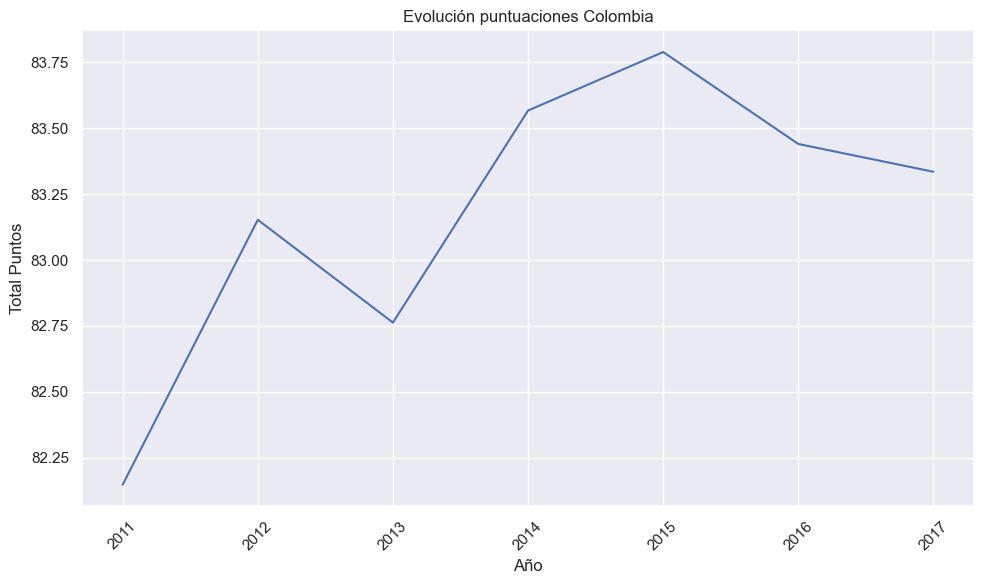

In [297]:
plt.figure(figsize=(10, 6))  

plt.plot(score_colombia['Year'], score_colombia['Score_Total'], color='b')

plt.title('Evolución puntuaciones Colombia')
plt.xlabel('Año')
plt.ylabel('Total Puntos')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

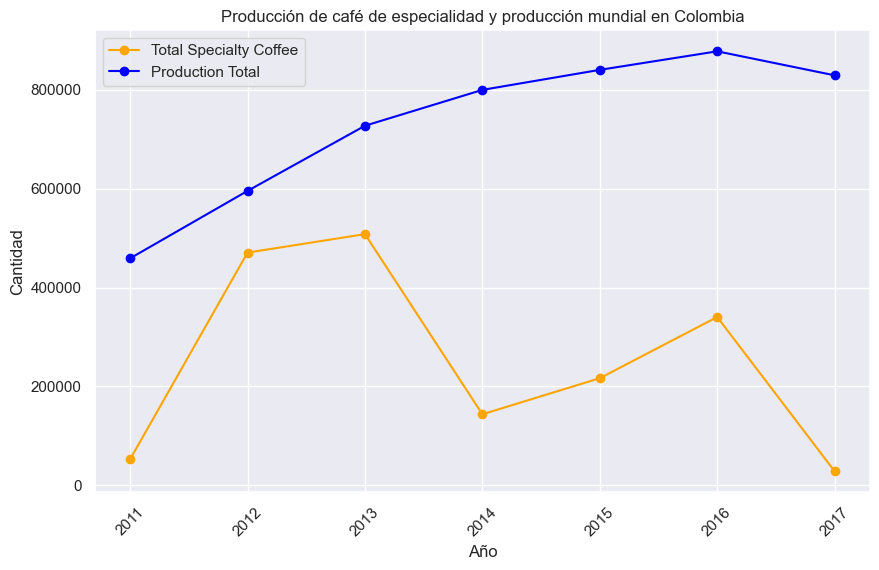

In [288]:
Colombia_data = analisis_paises[analisis_paises['Country'] == 'Colombia']

plt.figure(figsize=(10, 6))
plt.plot(Colombia_data['Year'], Colombia_data['Total_Specialty_coffee'], label='Total Specialty Coffee', marker='o')
plt.plot(Colombia_data['Year'], Colombia_data['Total_Production'], label='Production Total', marker='o')

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Producción de café de especialidad y producción mundial en Colombia')
plt.legend()

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

### Test de hipotesis en Colombia 

In [239]:
wilcoxon(colombia.Total_Specialty_coffee,colombia.Total_Production)

WilcoxonResult(statistic=0.0, pvalue=0.015625)

In [240]:
spearmanr(colombia.Total_Specialty_coffee,colombia.Total_Production)

SignificanceResult(statistic=-0.03571428571428572, pvalue=0.9394082054712856)

In [241]:
kendalltau(colombia.Total_Specialty_coffee,colombia.Total_Production)

SignificanceResult(statistic=0.04761904761904762, pvalue=1.0)

### Analisamos Ethiopia

In [291]:
# Vemos la producción de Colombia
score_ethiopia= analisis_paises[analisis_paises['Country']=='Ethiopia']
score_ethiopia

,Country,Year,Total_Specialty_coffee,Total_Production,% Specialty Coffee,%_Specialty_VS_Production_Total,Score_Total
4,Ethiopia,2017,38400.0,440803.99,8.71,0.663742,84.875
27,Ethiopia,2016,37200.0,428578.78,8.68,0.505141,83.080
44,Ethiopia,2015,38400.0,390898.52,9.82,0.561453,85.460
55,Ethiopia,2014,233700.0,382995.71,61.02,2.751343,86.588
82,Ethiopia,2013,9000.0,374546.63,2.40,0.103093,85.540
90,Ethiopia,2012,6000.0,367920.40,1.63,0.070445,84.080
110,Ethiopia,2010,7920.0,333623.09,2.37,0.187322,82.310


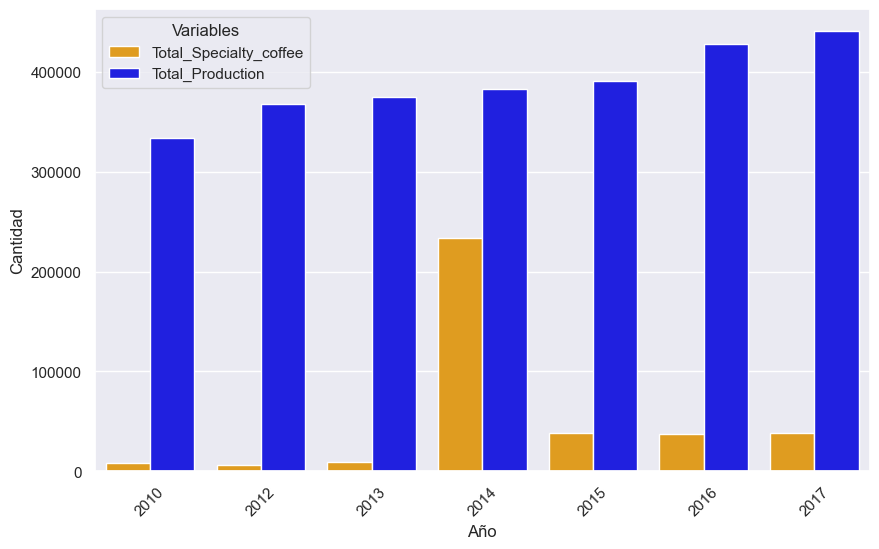

In [293]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

data = score_ethiopia[['Year', 'Total_Specialty_coffee', 'Total_Production']]

# Apilamos los datos en el DataFrame para tener las dos variables en la misma columna
data = data.melt(id_vars='Year', var_name='Variable', value_name='Cantidad')

# Cambiar el orden de los colores para que 'Total_Specialty_coffee' se muestre en la parte superior
sns.set_palette(sns.color_palette(['orange', 'blue']))

# Crear el gráfico de barras agrupadas
sns.barplot(x='Year', y='Cantidad', hue='Variable', data=data)

# plt.title('Production de café por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

plt.xticks(rotation=45)

plt.legend(title='Variables', loc='upper left')

plt.show()

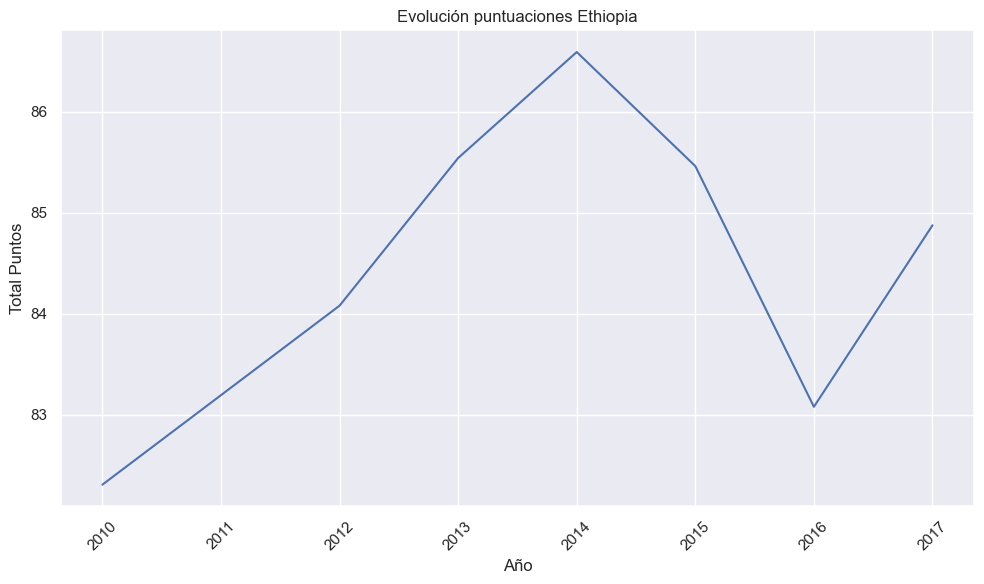

In [294]:
plt.figure(figsize=(10, 6))  

plt.plot(score_ethiopia['Year'], score_ethiopia['Score_Total'], color='b')

plt.title('Evolución puntuaciones Ethiopia')
plt.xlabel('Año')
plt.ylabel('Total Puntos')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

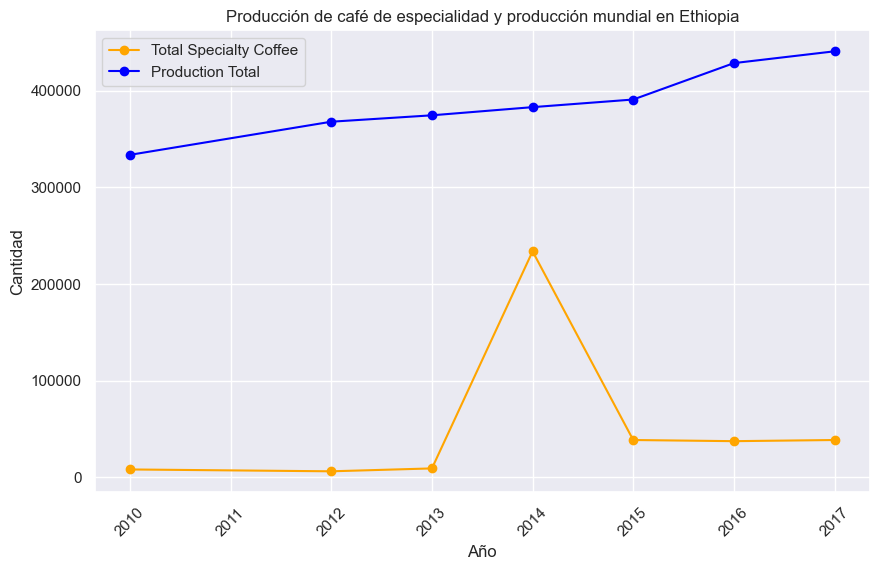

In [296]:
plt.figure(figsize=(10, 6))
plt.plot(score_ethiopia['Year'], score_ethiopia['Total_Specialty_coffee'], label='Total Specialty Coffee', marker='o')
plt.plot(score_ethiopia['Year'], score_ethiopia['Total_Production'], label='Production Total', marker='o')

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Producción de café de especialidad y producción mundial en Ethiopia')
plt.legend()

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

#### Test de hipotesis es Ethiopia

In [298]:
print(wilcoxon(Brazil.Total_Specialty_coffee,Brazil.Total_Production))
print(spearmanr(colombia.Total_Specialty_coffee,colombia.Total_Production))
print(kendalltau(colombia.Total_Specialty_coffee,colombia.Total_Production))

WilcoxonResult(statistic=0.0, pvalue=0.015625)
SignificanceResult(statistic=-0.03571428571428572, pvalue=0.9394082054712856)
SignificanceResult(statistic=0.04761904761904762, pvalue=1.0)


#### Para verificar la segunda hipotesis, creamos una nueva columna que compare el total de café de especialidad por año por país entre el total producido ese año para determinar quien es el mayor productor de café de especialidad

In [242]:
# Calcular el porcentaje de Specialty Coffee en comparación con la suma total de Production_World por año
analisis_paises['%_Specialty_VS_Production_Total'] = analisis_paises['Total_Specialty_coffee'] / analisis_paises.groupby('Year')['Total_Production'].transform('sum') * 100

# Calcular el promedio del porcentaje de Specialty Coffee para cada país
average_percentage_by_country = analisis_paises.groupby('Country')['%_Specialty_VS_Production_Total'].mean()

# Encontrar el país con el mayor promedio del porcentaje de Specialty Coffee
country_with_highest_percentage = average_percentage_by_country.idxmax()

# Obtener el valor del mayor promedio
highest_percentage_value = average_percentage_by_country.max()

print(f"El país que más café de especialidad produce en comparación con la suma total de Production_World por año es {country_with_highest_percentage} con un promedio de {highest_percentage_value:.2f}%.")


El país que más café de especialidad produce en comparación con la suma total de Production_World por año es Guatemala con un promedio de 4.28%.


In [243]:
# Ordenamos el Data frame por la columna creada, para obtener un top de países productor de cafe de especialidad por año
analisis_paises = analisis_paises.sort_values(by='Year', ascending=False)
analisis_paises.reset_index(drop=True,inplace=True)

In [244]:
analisis_paises

,Country,Year,Total_Specialty_coffee,Total_Production,% Specialty Coffee,%_Specialty_VS_Production_Total
0,Honduras,2018,18975.00,429172.82,4.42,4.421296
1,Kenya,2017,34350.00,47371.01,72.51,0.593738
2,Honduras,2017,133455.00,453586.08,29.42,2.306762
3,India,2017,38400.00,348793.43,11.01,0.663742
4,Ethiopia,2017,38400.00,440803.99,8.71,0.663742
...,...,...,...,...,...,...
108,Indonesia,2011,30.00,413335.40,0.01,0.000782
109,Indonesia,2010,600.00,547710.71,0.11,0.014191
110,Ethiopia,2010,7920.00,333623.09,2.37,0.187322
111,Haiti,2010,5012.19,20971.69,23.90,0.118547


In [245]:
analisis_paises[analisis_paises['Country']=='Guatemala']

,Country,Year,Total_Specialty_coffee,Total_Production,% Specialty Coffee,%_Specialty_VS_Production_Total
13,Guatemala,2017,124200.00,224023.57,55.44,2.146790
22,Guatemala,2016,619053.00,221052.54,280.05,8.406153
43,Guatemala,2015,197970.00,204586.86,96.77,2.894554
51,Guatemala,2014,447237.11,198604.55,225.19,5.265308
77,Guatemala,2013,450623.69,191362.28,235.48,5.161815
84,Guatemala,2012,155869.19,225775.99,69.04,1.830043


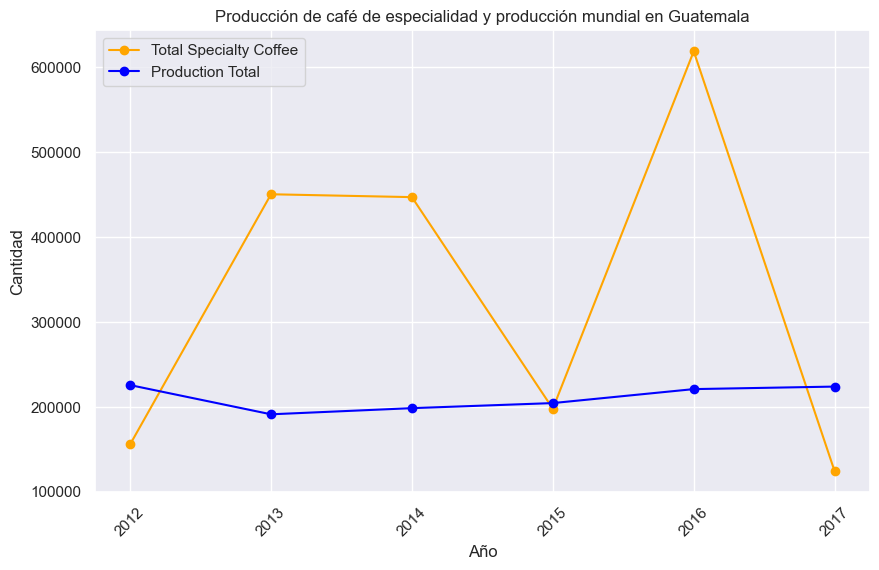

In [246]:
guatemala_data = analisis_paises[analisis_paises['Country'] == 'Guatemala']

plt.figure(figsize=(10, 6))
plt.plot(guatemala_data['Year'], guatemala_data['Total_Specialty_coffee'], label='Total Specialty Coffee', marker='o')
plt.plot(guatemala_data['Year'], guatemala_data['Total_Production'], label='Production Total', marker='o')

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Producción de café de especialidad y producción mundial en Guatemala')
plt.legend()

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

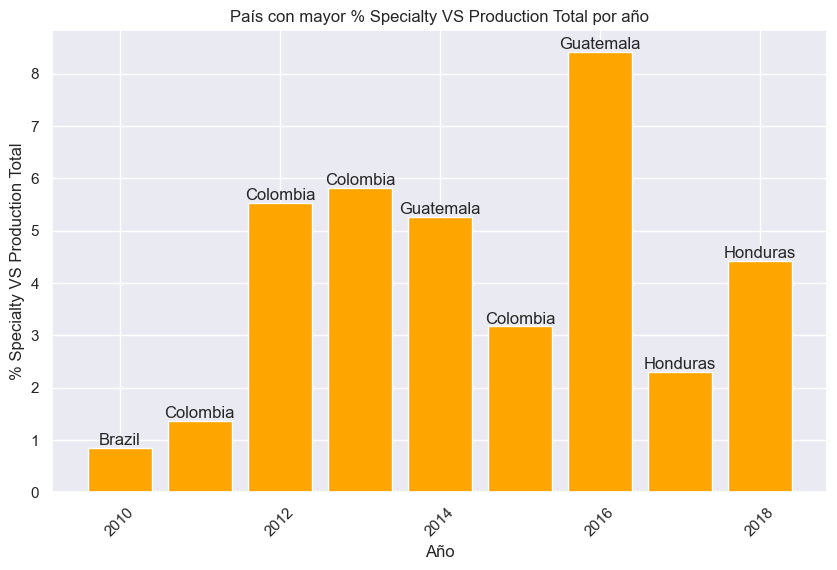

In [247]:
# Encontrar el país que tenga el mayor valor en la columna %_Specialty_VS_Production_Total por año
max_specialty_country_by_year = analisis_paises.loc[analisis_paises.groupby('Year')['%_Specialty_VS_Production_Total'].idxmax()]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(max_specialty_country_by_year['Year'], max_specialty_country_by_year['%_Specialty_VS_Production_Total'])
plt.xlabel('Año')
plt.ylabel('% Specialty VS Production Total')
plt.title('País con mayor % Specialty VS Production Total por año')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el nombre del país en cada barra
for index, row in max_specialty_country_by_year.iterrows():
    plt.text(row['Year'], row['%_Specialty_VS_Production_Total'], row['Country'], ha='center', va='bottom')

plt.show()

### Al ser colombia el país que mas se reptie, analizaremos su producción de cafés especialies 